# Assignment - Data Scientist

#### Task : 
**Binary Classification - Do an exploratory analysis of the dataset provided, decide on feature selection, preprocessing before training a model to classify as class ‘0’ or class ‘1’.**


**Given files :**<br>
**1.	training_set.csv - To be used as training and validation set - 3910 records, 57 features, 1 output**<br>
**2.	test_set.csv (without Ground Truth) - 691 records, 57 features**


In [1]:
#import required libraries
import os
import json

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(np.__version__)

1.0.5
3.2.2
0.10.1
1.19.5


In [3]:
#define input dir path
INPUT_DIR = "Arya_DataScientist_Assignment"

In [4]:
#read train and test csv
train = pd.read_csv(os.path.join(INPUT_DIR,"training_set.csv"),index_col=0)
test = pd.read_csv(os.path.join(INPUT_DIR,"test_set.csv"),index_col=0)

In [5]:
print("Train set shape {0}\nTest set shape {1}".format(train.shape,test.shape))
train.head()

Train set shape (3910, 58)
Test set shape (691, 57)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


**Observation :** <br>
We have 57 Features in train set with 3910 records<br>
Test set has 691 records without ground truth 


## Explore Dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [7]:
train.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [8]:
# Number of Duplicates Record
print("**Duplicate rows in Dataframe**")
print("Train : ",train.duplicated().sum())
print("Test : ",test.duplicated().sum())

**Duplicate rows in Dataframe**
Train :  296
Test :  30


In [9]:
# Get list of duplicate columns
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


print('*** Find duplicate Columns in a DataFrame ***')
duplicateColumnNames = getDuplicateColumns(train)
if duplicateColumnNames:
    print("Duplicate cols are :",len(duplicateColumnNames))
    for col in duplicateColumnNames:
        print('Column name : ', col)
else:
    print("No duplicate columns present")
    

*** Find duplicate Columns in a DataFrame ***
No duplicate columns present


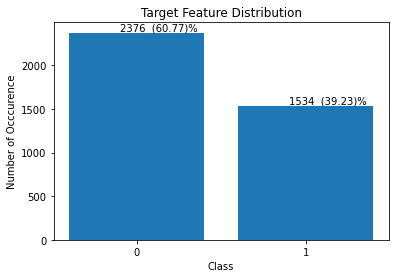

In [10]:
target_count = train['Y'].value_counts()
plt.bar(['0', '1'], [target_count[0], target_count[1]])
for index, value in enumerate(target_count.values):
    plt.text(index-0.1, value+25, str(value)+'  (' +str(np.round(value/train.shape[0]*100,2))+')%')
plt.xlabel('Class')
plt.ylabel('Number of Occcurence')
plt.title('Target Feature Distribution')
plt.show()

In [11]:
train['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

In [12]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

**Observations :**<br>
1. Dataset Contains 3910 records and 58 features.
2. All feature values are numerical and continuous in nature
3. No missing values in dataset
4. No duplicate columns but have some duplicate records
5. Dataset is Slightly imbalanced,60 % 0s and 40% 1s(60:40).
6. Values of each feature are at different scale
7. Most of values are 0 

## Data Visualization

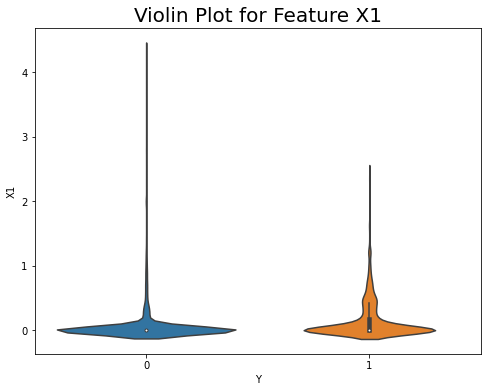

Basic Information about feature X1
Number of Zeros in X1 : 3017
Zero's Percentage in X1 : 77.16%
count    3910.000000
mean        0.102990
std         0.296322
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.340000
Name: X1, dtype: float64


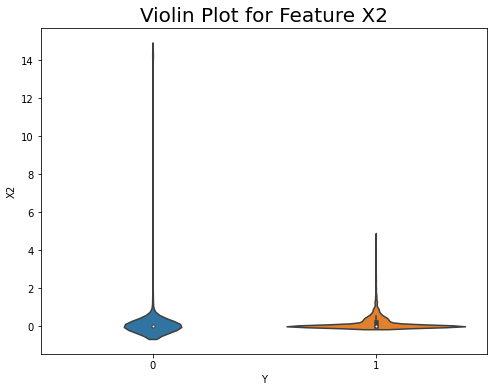

Basic Information about feature X2
Number of Zeros in X2 : 3146
Zero's Percentage in X2 : 80.46%
count    3910.000000
mean        0.206419
std         1.253828
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X2, dtype: float64


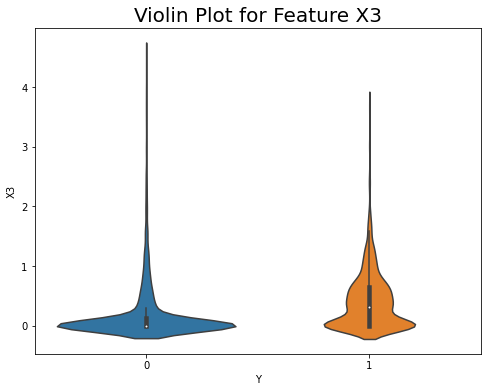

Basic Information about feature X3
Number of Zeros in X3 : 2289
Zero's Percentage in X3 : 58.54%
count    3910.000000
mean        0.284419
std         0.504352
min         0.000000
25%         0.000000
50%         0.000000
75%         0.430000
max         4.540000
Name: X3, dtype: float64


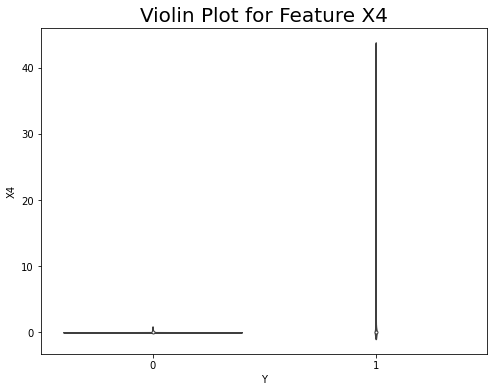

Basic Information about feature X4
Number of Zeros in X4 : 3871
Zero's Percentage in X4 : 99.0%
count    3910.000000
mean        0.062074
std         1.369361
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        42.810000
Name: X4, dtype: float64


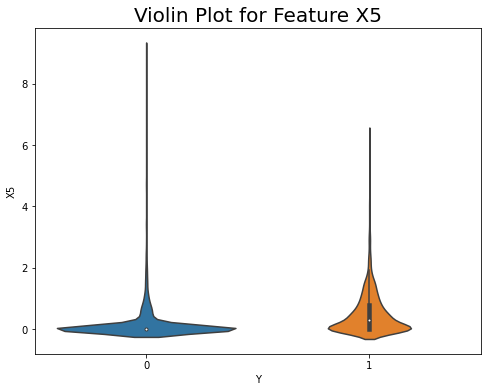

Basic Information about feature X5
Number of Zeros in X5 : 2414
Zero's Percentage in X5 : 61.74%
count    3910.000000
mean        0.311309
std         0.656195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.387500
max         9.090000
Name: X5, dtype: float64


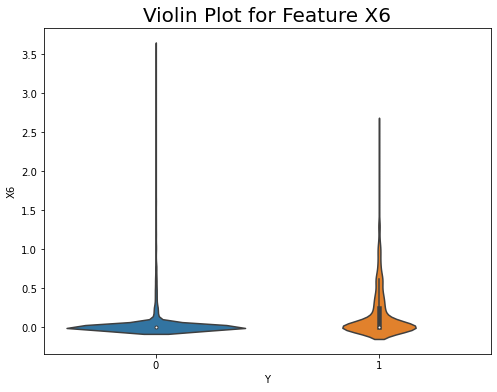

Basic Information about feature X6
Number of Zeros in X6 : 3050
Zero's Percentage in X6 : 78.01%
count    3910.000000
mean        0.095974
std         0.261455
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.570000
Name: X6, dtype: float64


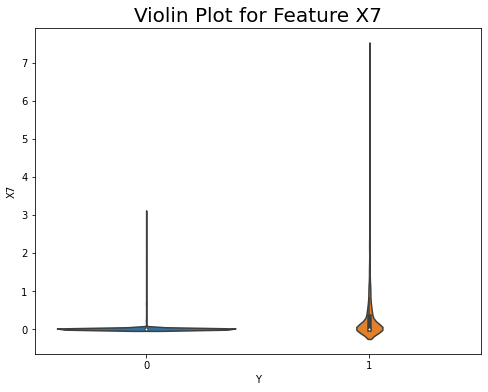

Basic Information about feature X7
Number of Zeros in X7 : 3226
Zero's Percentage in X7 : 82.51%
count    3910.000000
mean        0.112320
std         0.389516
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.270000
Name: X7, dtype: float64


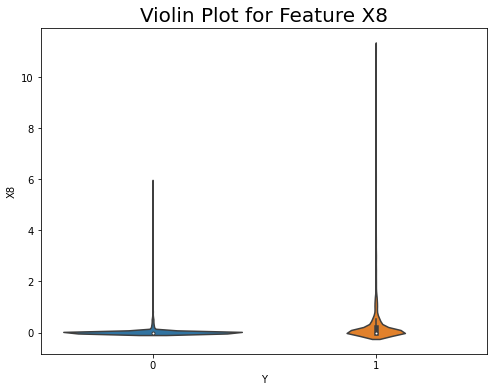

Basic Information about feature X8
Number of Zeros in X8 : 3195
Zero's Percentage in X8 : 81.71%
count    3910.000000
mean        0.106041
std         0.398694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.110000
Name: X8, dtype: float64


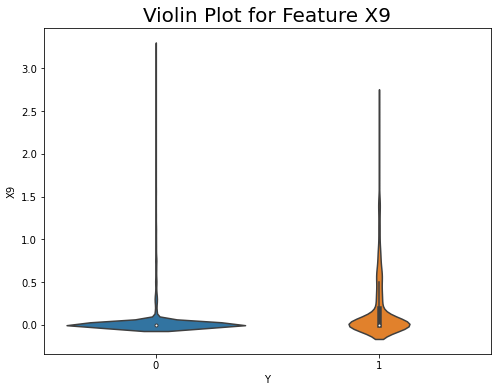

Basic Information about feature X9
Number of Zeros in X9 : 3247
Zero's Percentage in X9 : 83.04%
count    3910.000000
mean        0.091146
std         0.271417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.230000
Name: X9, dtype: float64


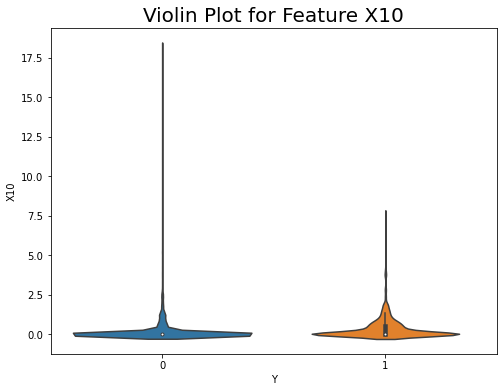

Basic Information about feature X10
Number of Zeros in X10 : 2804
Zero's Percentage in X10 : 71.71%
count    3910.000000
mean        0.244345
std         0.667065
min         0.000000
25%         0.000000
50%         0.000000
75%         0.170000
max        18.180000
Name: X10, dtype: float64


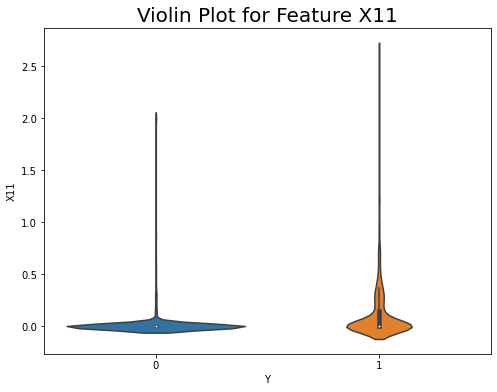

Basic Information about feature X11
Number of Zeros in X11 : 3302
Zero's Percentage in X11 : 84.45%
count    3910.000000
mean        0.060808
std         0.203018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.610000
Name: X11, dtype: float64


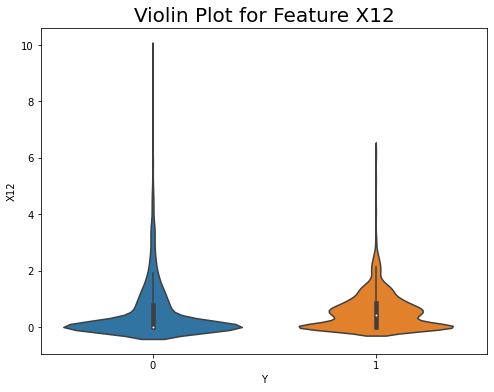

Basic Information about feature X12
Number of Zeros in X12 : 1915
Zero's Percentage in X12 : 48.98%
count    3910.000000
mean        0.553685
std         0.876412
min         0.000000
25%         0.000000
50%         0.140000
75%         0.820000
max         9.670000
Name: X12, dtype: float64


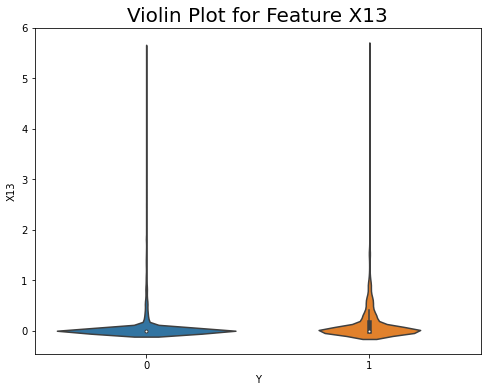

Basic Information about feature X13
Number of Zeros in X13 : 3183
Zero's Percentage in X13 : 81.41%
count    3910.000000
mean        0.094113
std         0.303433
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.550000
Name: X13, dtype: float64


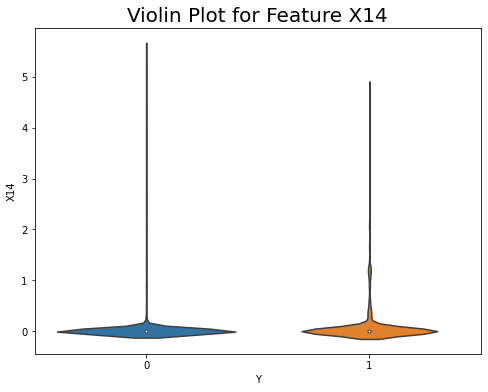

Basic Information about feature X14
Number of Zeros in X14 : 3603
Zero's Percentage in X14 : 92.15%
count    3910.000000
mean        0.057205
std         0.307892
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.550000
Name: X14, dtype: float64


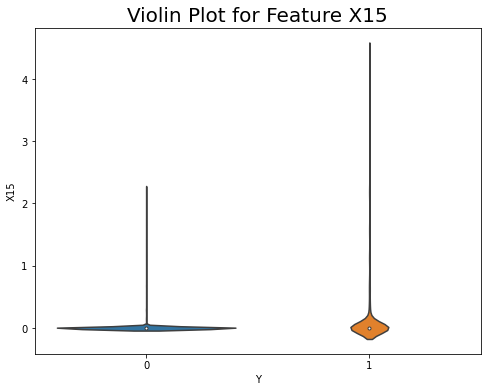

Basic Information about feature X15
Number of Zeros in X15 : 3628
Zero's Percentage in X15 : 92.79%
count    3910.000000
mean        0.048545
std         0.255293
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.410000
Name: X15, dtype: float64


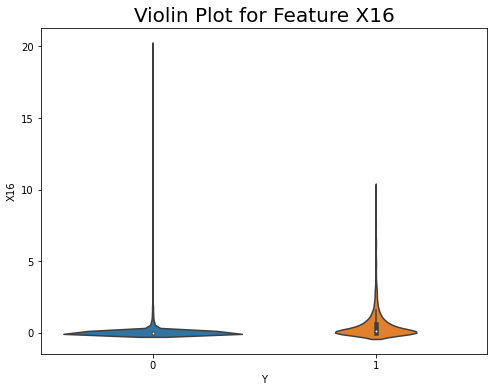

Basic Information about feature X16
Number of Zeros in X16 : 2849
Zero's Percentage in X16 : 72.86%
count    3910.000000
mean        0.246598
std         0.799327
min         0.000000
25%         0.000000
50%         0.000000
75%         0.110000
max        20.000000
Name: X16, dtype: float64


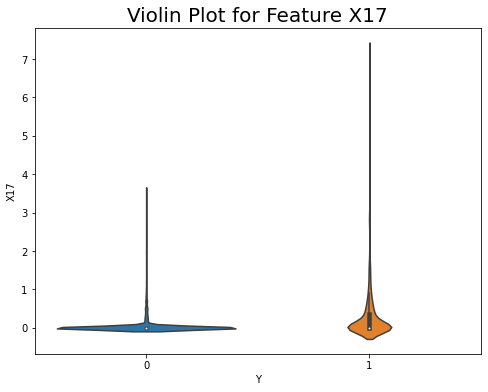

Basic Information about feature X17
Number of Zeros in X17 : 3086
Zero's Percentage in X17 : 78.93%
count    3910.000000
mean        0.142780
std         0.444164
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.140000
Name: X17, dtype: float64


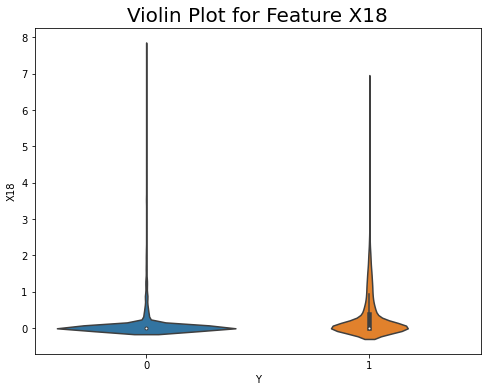

Basic Information about feature X18
Number of Zeros in X18 : 3026
Zero's Percentage in X18 : 77.39%
count    3910.000000
mean        0.185514
std         0.526497
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.690000
Name: X18, dtype: float64


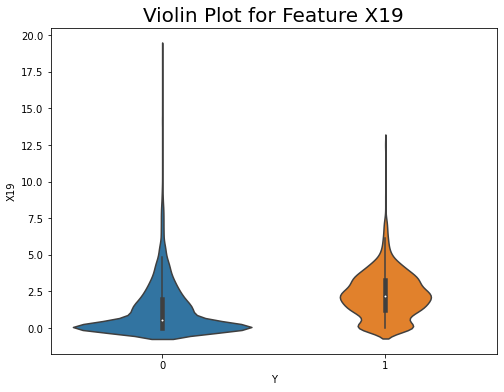

Basic Information about feature X19
Number of Zeros in X19 : 1152
Zero's Percentage in X19 : 29.46%
count    3910.000000
mean        1.660939
std         1.760214
min         0.000000
25%         0.000000
50%         1.310000
75%         2.637500
max        18.750000
Name: X19, dtype: float64


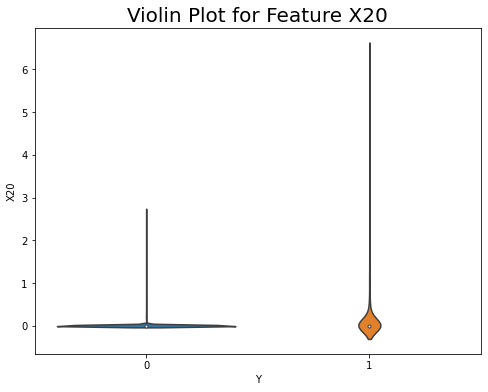

Basic Information about feature X20
Number of Zeros in X20 : 3546
Zero's Percentage in X20 : 90.69%
count    3910.000000
mean        0.083880
std         0.439199
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.320000
Name: X20, dtype: float64


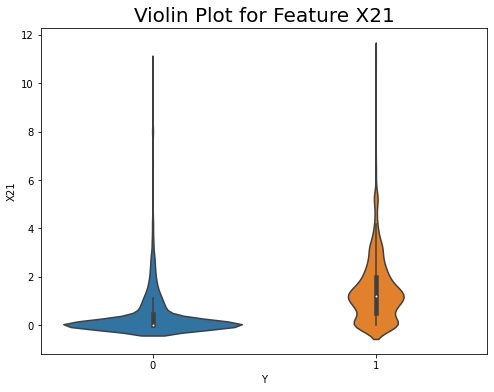

Basic Information about feature X21
Number of Zeros in X21 : 1848
Zero's Percentage in X21 : 47.26%
count    3910.000000
mean        0.818253
std         1.210078
min         0.000000
25%         0.000000
50%         0.235000
75%         1.270000
max        11.110000
Name: X21, dtype: float64


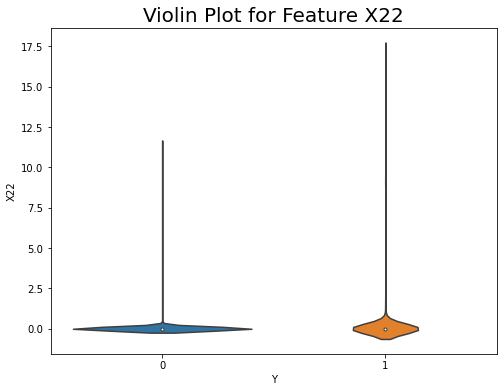

Basic Information about feature X22
Number of Zeros in X22 : 3821
Zero's Percentage in X22 : 97.72%
count    3910.000000
mean        0.112113
std         0.990195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.100000
Name: X22, dtype: float64


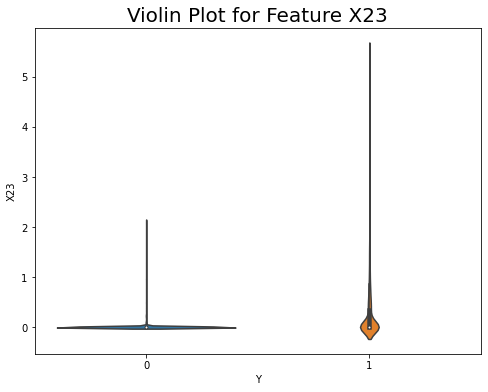

Basic Information about feature X23
Number of Zeros in X23 : 3330
Zero's Percentage in X23 : 85.17%
count    3910.000000
mean        0.101343
std         0.345887
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.450000
Name: X23, dtype: float64


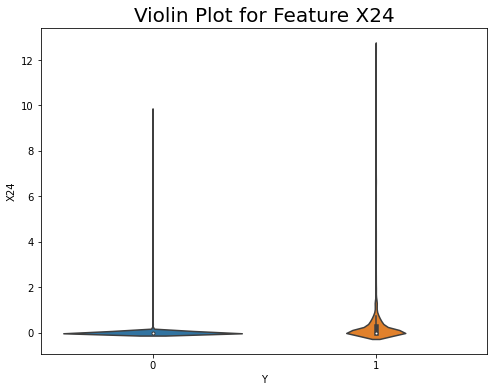

Basic Information about feature X24
Number of Zeros in X24 : 3280
Zero's Percentage in X24 : 83.89%
count    3910.000000
mean        0.095199
std         0.443482
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: X24, dtype: float64


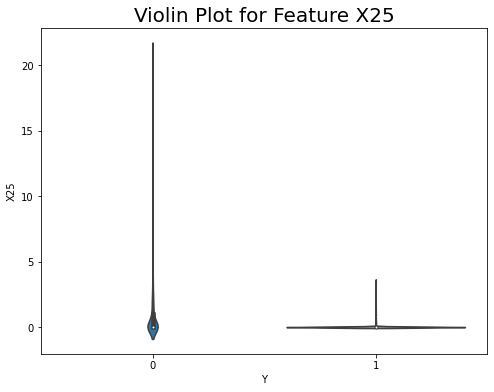

Basic Information about feature X25
Number of Zeros in X25 : 2978
Zero's Percentage in X25 : 76.16%
count    3910.000000
mean        0.565790
std         1.733593
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.830000
Name: X25, dtype: float64


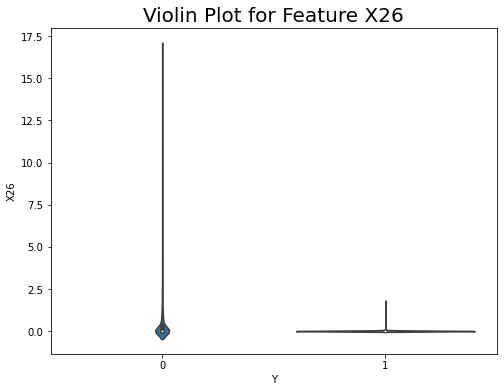

Basic Information about feature X26
Number of Zeros in X26 : 3218
Zero's Percentage in X26 : 82.3%
count    3910.000000
mean        0.266668
std         0.892676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.660000
Name: X26, dtype: float64


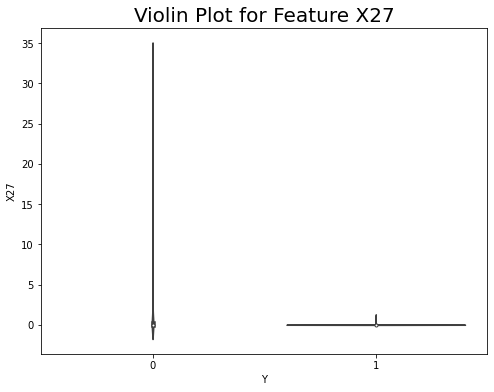

Basic Information about feature X27
Number of Zeros in X27 : 3238
Zero's Percentage in X27 : 82.81%
count    3910.000000
mean        0.757120
std         3.321562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.330000
Name: X27, dtype: float64


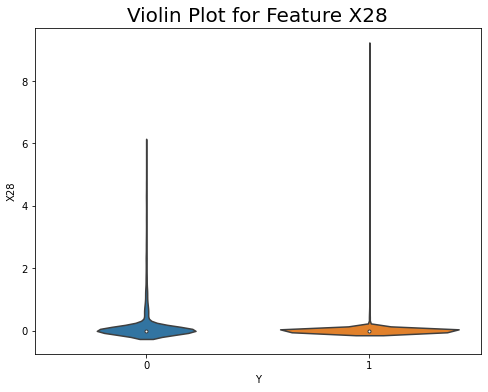

Basic Information about feature X28
Number of Zeros in X28 : 3520
Zero's Percentage in X28 : 90.03%
count    3910.000000
mean        0.125312
std         0.545827
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.090000
Name: X28, dtype: float64


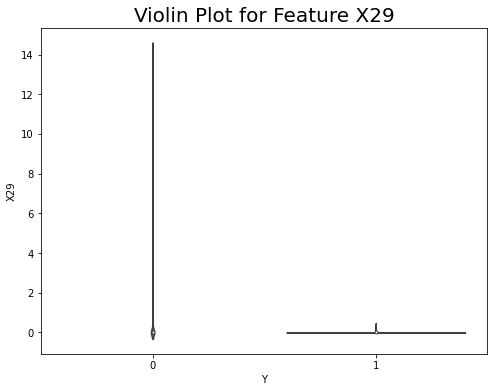

Basic Information about feature X29
Number of Zeros in X29 : 3595
Zero's Percentage in X29 : 91.94%
count    3910.000000
mean        0.100320
std         0.608313
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X29, dtype: float64


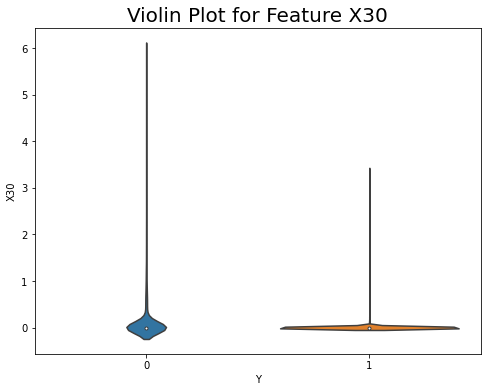

Basic Information about feature X30
Number of Zeros in X30 : 3511
Zero's Percentage in X30 : 89.8%
count    3910.000000
mean        0.105274
std         0.464483
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.880000
Name: X30, dtype: float64


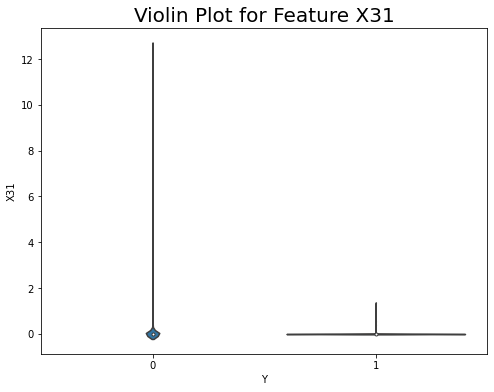

Basic Information about feature X31
Number of Zeros in X31 : 3661
Zero's Percentage in X31 : 93.63%
count    3910.000000
mean        0.065859
std         0.409316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: X31, dtype: float64


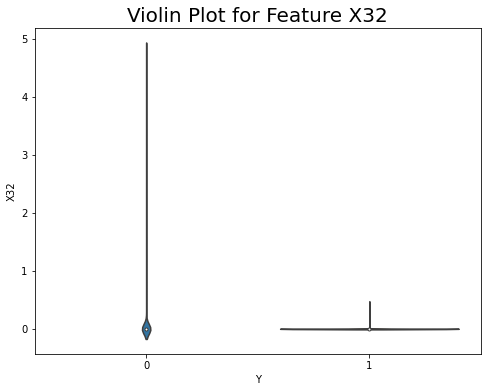

Basic Information about feature X32
Number of Zeros in X32 : 3734
Zero's Percentage in X32 : 95.5%
count    3910.000000
mean        0.046563
std         0.321900
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X32, dtype: float64


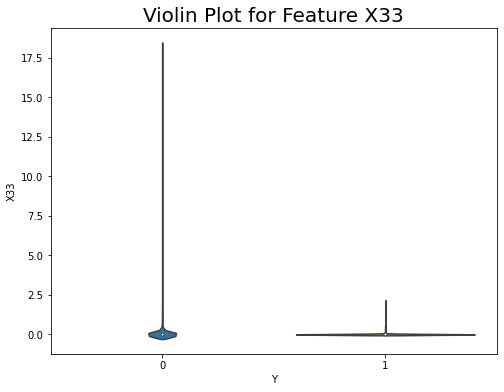

Basic Information about feature X33
Number of Zeros in X33 : 3565
Zero's Percentage in X33 : 91.18%
count    3910.000000
mean        0.094281
std         0.538145
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.180000
Name: X33, dtype: float64


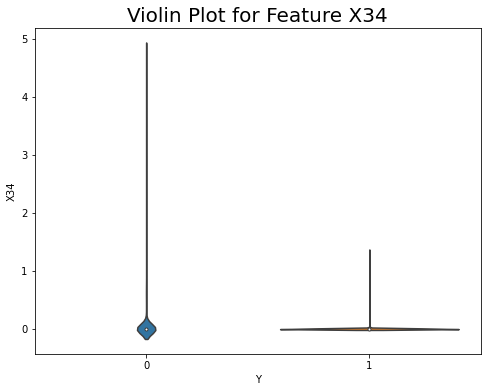

Basic Information about feature X34
Number of Zeros in X34 : 3726
Zero's Percentage in X34 : 95.29%
count    3910.000000
mean        0.047409
std         0.322958
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X34, dtype: float64


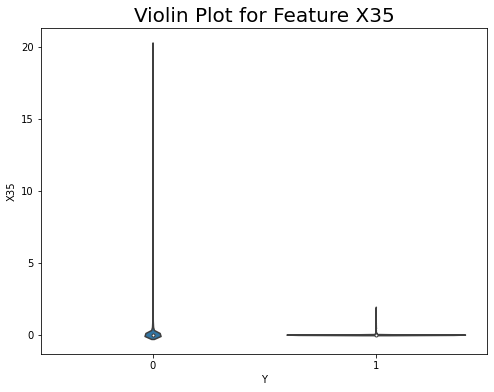

Basic Information about feature X35
Number of Zeros in X35 : 3496
Zero's Percentage in X35 : 89.41%
count    3910.000000
mean        0.108414
std         0.551546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: X35, dtype: float64


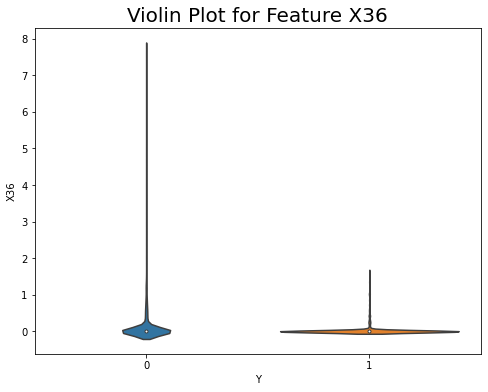

Basic Information about feature X36
Number of Zeros in X36 : 3412
Zero's Percentage in X36 : 87.26%
count    3910.000000
mean        0.094258
std         0.395220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.690000
Name: X36, dtype: float64


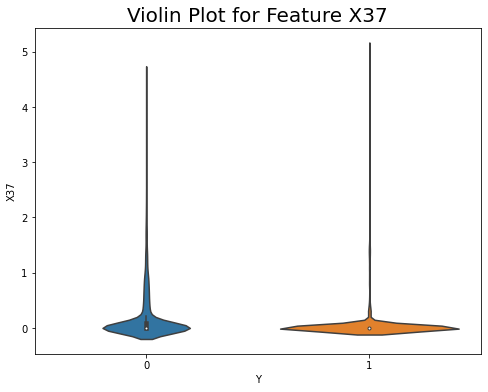

Basic Information about feature X37
Number of Zeros in X37 : 3210
Zero's Percentage in X37 : 82.1%
count    3910.000000
mean        0.134980
std         0.409085
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.050000
Name: X37, dtype: float64


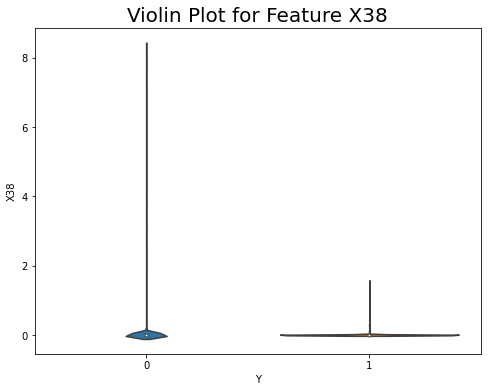

Basic Information about feature X38
Number of Zeros in X38 : 3836
Zero's Percentage in X38 : 98.11%
count    3910.000000
mean        0.013463
std         0.215280
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.330000
Name: X38, dtype: float64


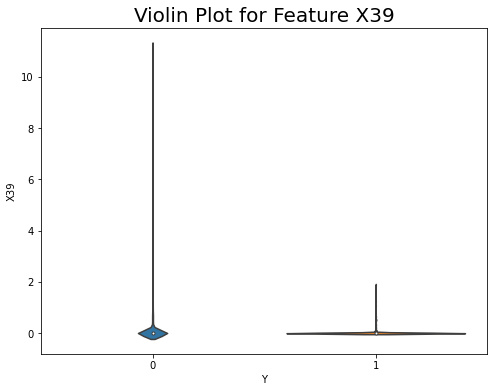

Basic Information about feature X39
Number of Zeros in X39 : 3574
Zero's Percentage in X39 : 91.41%
count    3910.000000
mean        0.080286
std         0.423936
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.110000
Name: X39, dtype: float64


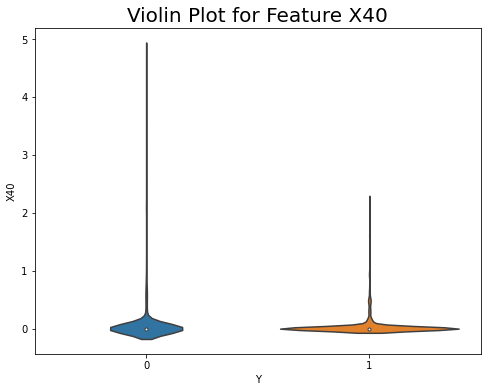

Basic Information about feature X40
Number of Zeros in X40 : 3523
Zero's Percentage in X40 : 90.1%
count    3910.000000
mean        0.065077
std         0.346739
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X40, dtype: float64


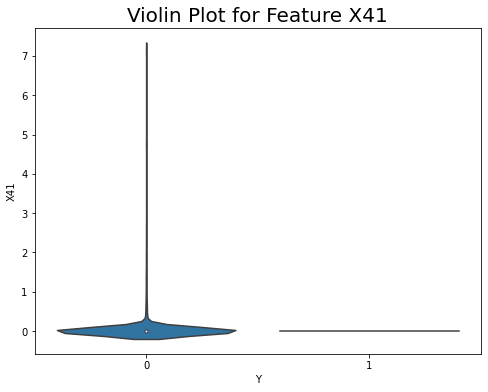

Basic Information about feature X41
Number of Zeros in X41 : 3784
Zero's Percentage in X41 : 96.78%
count    3910.000000
mean        0.044959
std         0.375329
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.140000
Name: X41, dtype: float64


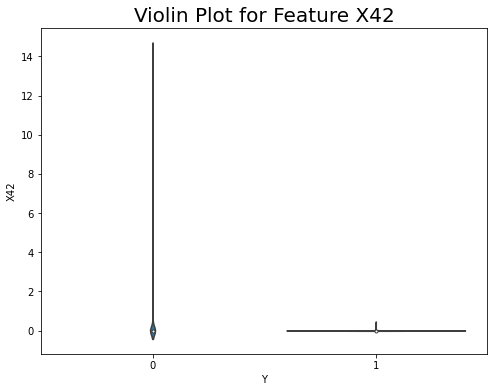

Basic Information about feature X42
Number of Zeros in X42 : 3619
Zero's Percentage in X42 : 92.56%
count    3910.000000
mean        0.139182
std         0.800478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X42, dtype: float64


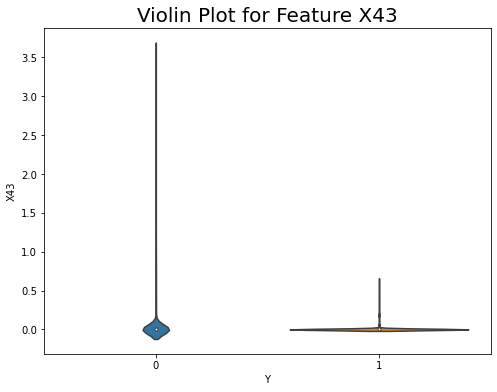

Basic Information about feature X43
Number of Zeros in X43 : 3591
Zero's Percentage in X43 : 91.84%
count    3910.000000
mean        0.047609
std         0.231074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.570000
Name: X43, dtype: float64


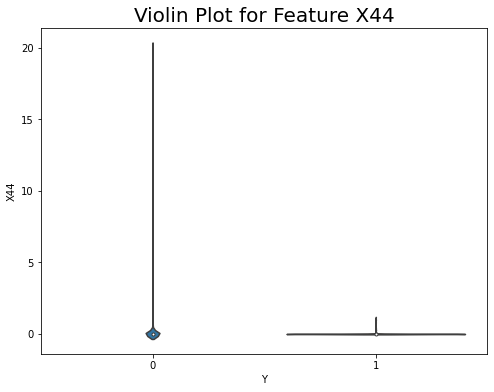

Basic Information about feature X44
Number of Zeros in X44 : 3626
Zero's Percentage in X44 : 92.74%
count    3910.000000
mean        0.081987
std         0.652636
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: X44, dtype: float64


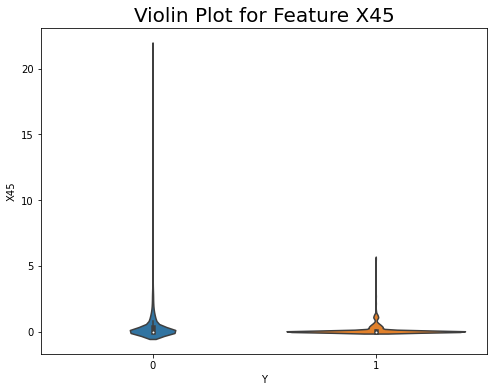

Basic Information about feature X45
Number of Zeros in X45 : 2794
Zero's Percentage in X45 : 71.46%
count    3910.000000
mean        0.313151
std         1.063868
min         0.000000
25%         0.000000
50%         0.000000
75%         0.120000
max        21.420000
Name: X45, dtype: float64


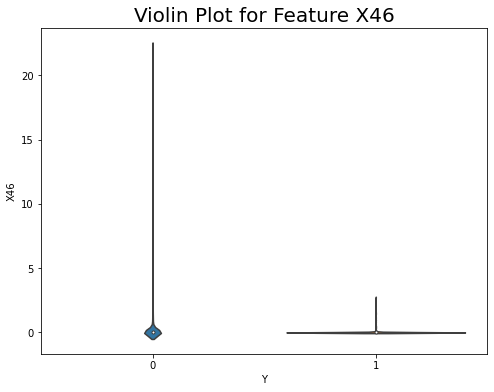

Basic Information about feature X46
Number of Zeros in X46 : 3483
Zero's Percentage in X46 : 89.08%
count    3910.000000
mean        0.182662
std         0.944817
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.050000
Name: X46, dtype: float64


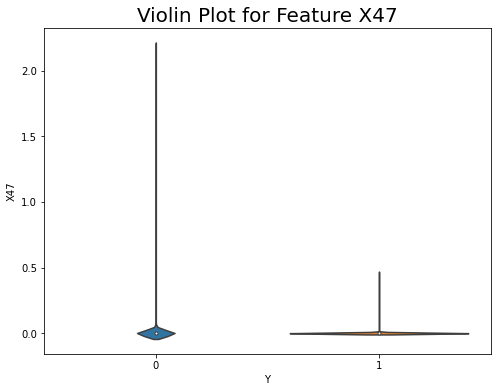

Basic Information about feature X47
Number of Zeros in X47 : 3854
Zero's Percentage in X47 : 98.57%
count    3910.000000
mean        0.006054
std         0.081662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.170000
Name: X47, dtype: float64


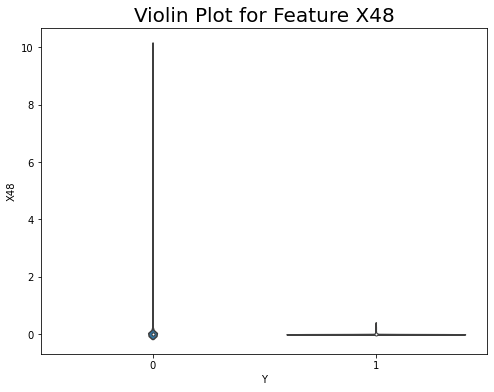

Basic Information about feature X48
Number of Zeros in X48 : 3738
Zero's Percentage in X48 : 95.6%
count    3910.000000
mean        0.033281
std         0.301611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: X48, dtype: float64


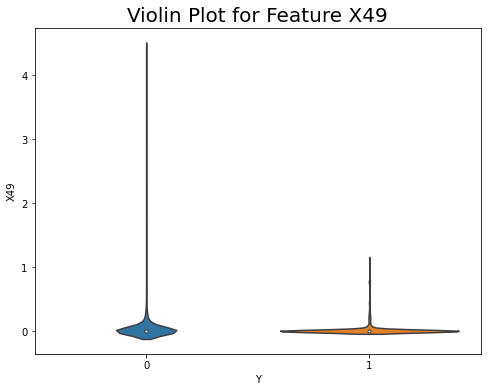

Basic Information about feature X49
Number of Zeros in X49 : 3239
Zero's Percentage in X49 : 82.84%
count    3910.000000
mean        0.037493
std         0.235054
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.385000
Name: X49, dtype: float64


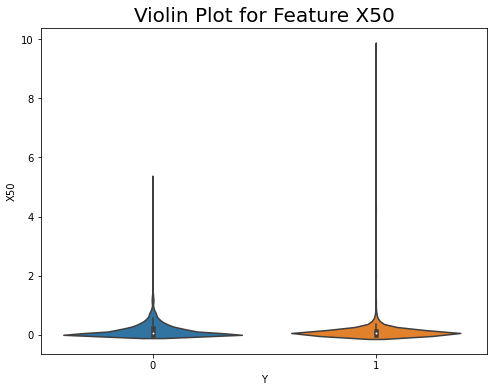

Basic Information about feature X50
Number of Zeros in X50 : 1590
Zero's Percentage in X50 : 40.66%
count    3910.000000
mean        0.139252
std         0.276309
min         0.000000
25%         0.000000
50%         0.066000
75%         0.188000
max         9.752000
Name: X50, dtype: float64


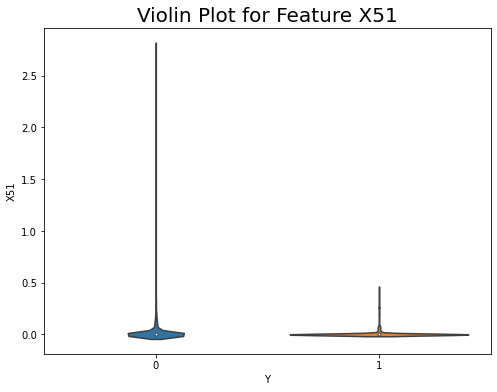

Basic Information about feature X51
Number of Zeros in X51 : 3453
Zero's Percentage in X51 : 88.31%
count    3910.000000
mean        0.015876
std         0.083600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.777000
Name: X51, dtype: float64


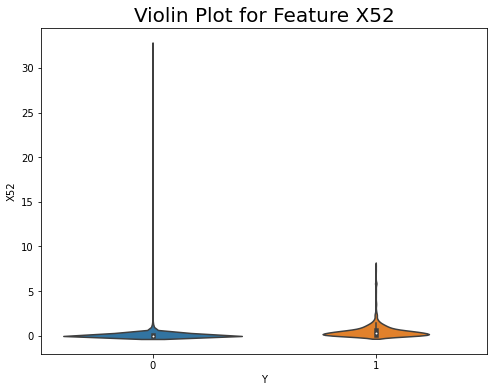

Basic Information about feature X52
Number of Zeros in X52 : 1999
Zero's Percentage in X52 : 51.13%
count    3910.000000
mean        0.272971
std         0.858634
min         0.000000
25%         0.000000
50%         0.000000
75%         0.317250
max        32.478000
Name: X52, dtype: float64


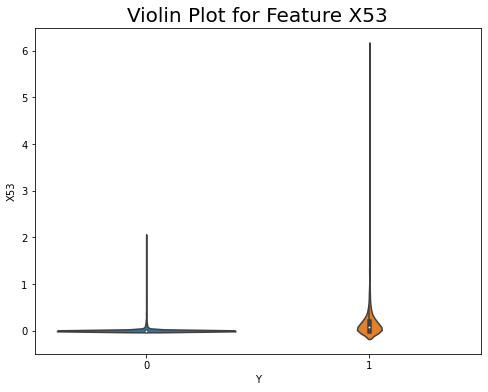

Basic Information about feature X53
Number of Zeros in X53 : 2713
Zero's Percentage in X53 : 69.39%
count    3910.000000
mean        0.077820
std         0.256991
min         0.000000
25%         0.000000
50%         0.000000
75%         0.054000
max         6.003000
Name: X53, dtype: float64


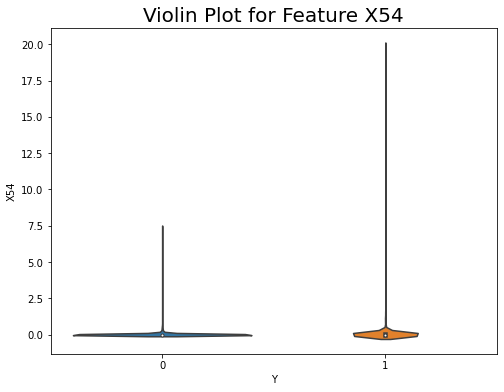

Basic Information about feature X54
Number of Zeros in X54 : 3267
Zero's Percentage in X54 : 83.55%
count    3910.000000
mean        0.043828
std         0.452862
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.829000
Name: X54, dtype: float64


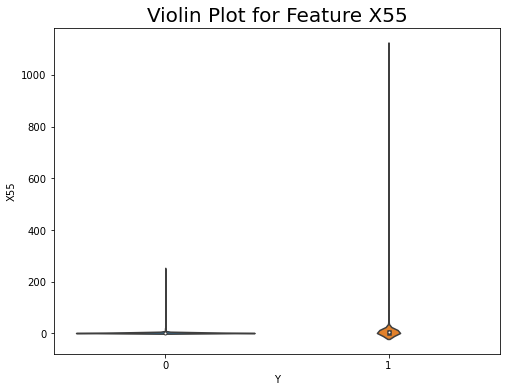

Basic Information about feature X55
Number of Zeros in X55 : 0
Zero's Percentage in X55 : 0%
count    3910.000000
mean        5.047150
std        31.397035
min         1.000000
25%         1.580750
50%         2.263500
75%         3.714000
max      1102.500000
Name: X55, dtype: float64


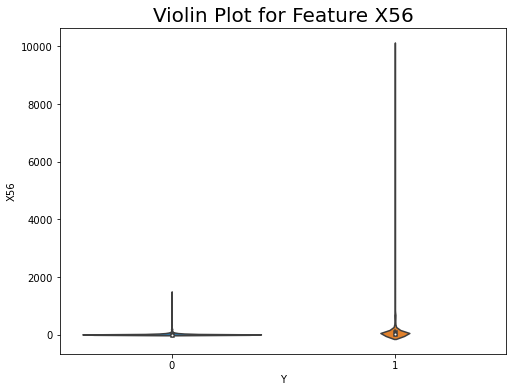

Basic Information about feature X56
Number of Zeros in X56 : 0
Zero's Percentage in X56 : 0%
count    3910.000000
mean       52.338107
std       204.445218
min         1.000000
25%         6.000000
50%        15.000000
75%        43.000000
max      9989.000000
Name: X56, dtype: float64


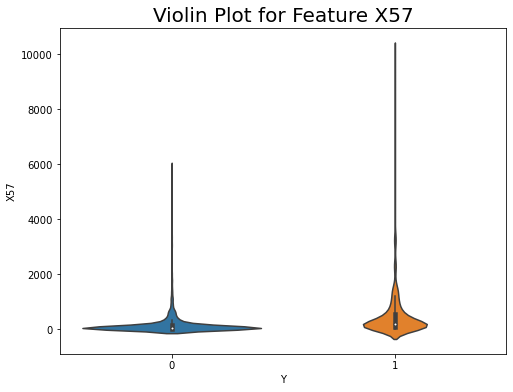

Basic Information about feature X57
Number of Zeros in X57 : 0
Zero's Percentage in X57 : 0%
count     3910.000000
mean       283.059079
std        578.339858
min          1.000000
25%         35.000000
50%         94.000000
75%        264.000000
max      10062.000000
Name: X57, dtype: float64


In [13]:
#Univariate analysis
y = train['Y']
data = train.iloc[:,:-1]


i=1
while(i<58):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=y, y='X'+str(i), data=data, size=10)
    plt.title('Violin Plot for Feature X'+str(i),fontsize=20)
    plt.show()
    print("Basic Information about feature X"+str(i))
    try:
        print('Number of Zeros in X{} : {}'.format(i,data['X'+str(i)].value_counts()[0]))
        print('Zero\'s Percentage in X{} : {}%'.format(i,np.round(data['X'+str(i)].value_counts()[0]/data.shape[0]*100,2)))
    except KeyError:
        print('Number of Zeros in X{} : {}'.format(i,0))
        print('Zero\'s Percentage in X{} : {}%'.format(i,0))
    print(data['X'+str(i)].describe())
    print('='*120)
    i+=1

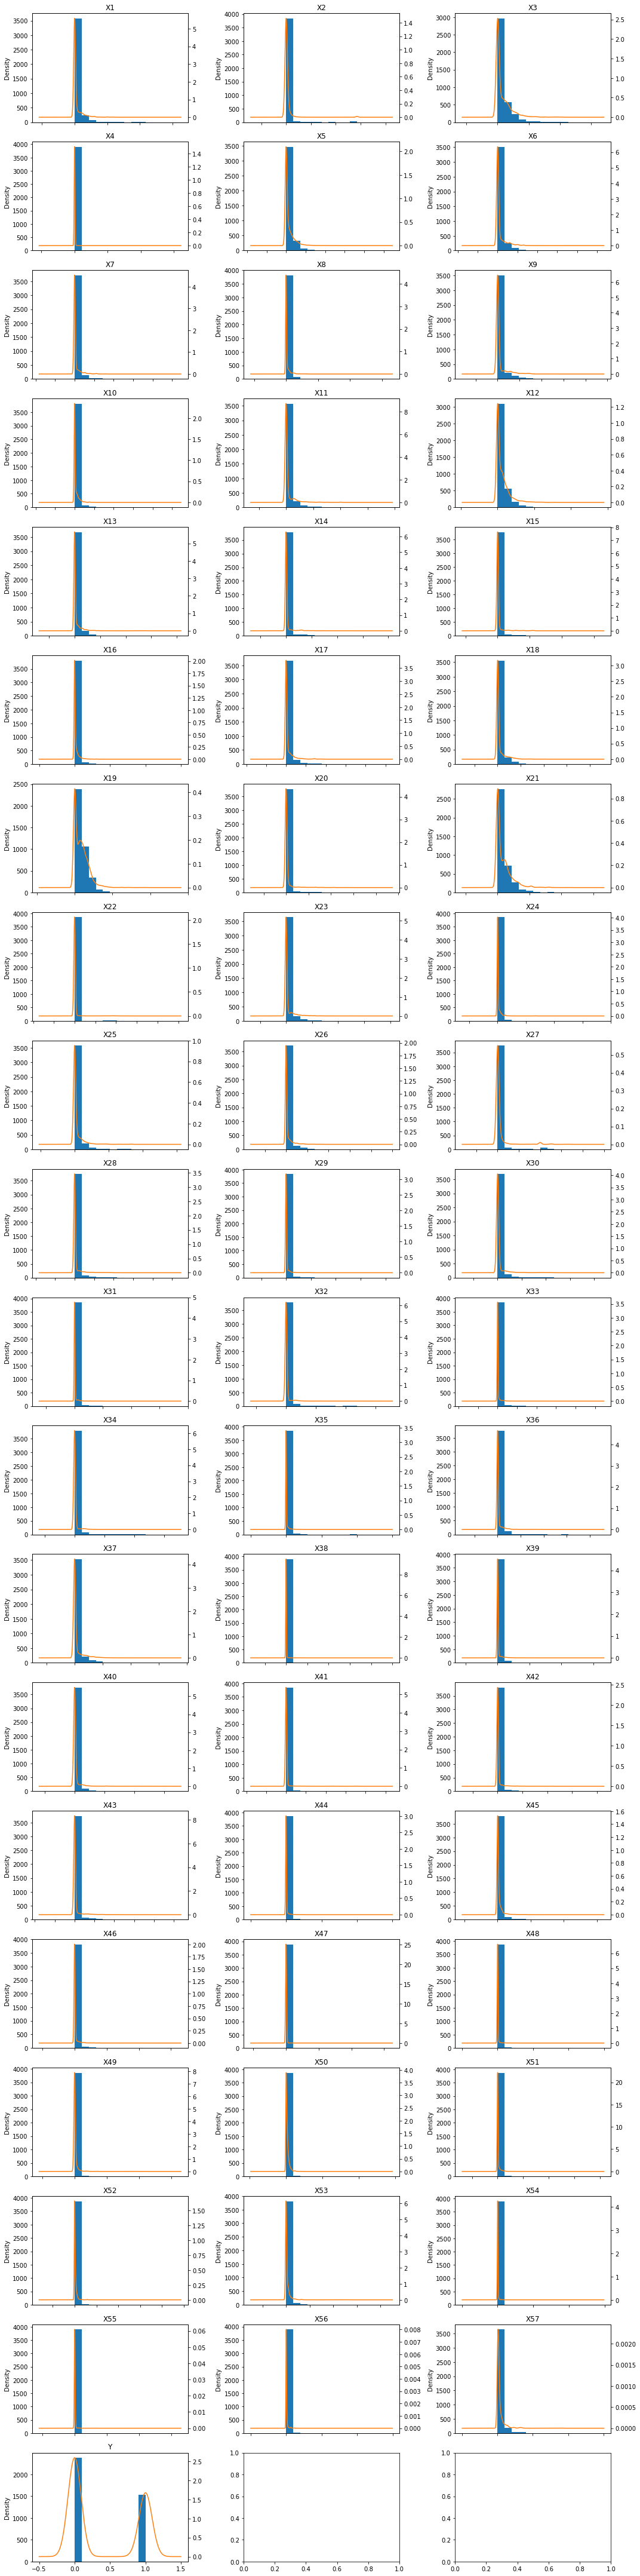

In [14]:
#Check distribution of each feature
k = len(train.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(train.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    #ax2.set_ylim(0)

fig.tight_layout()

**Observations :**

1. All the features has highly skewed distribution. 
2. We have highly sparse data, max of the feature values contains 0s

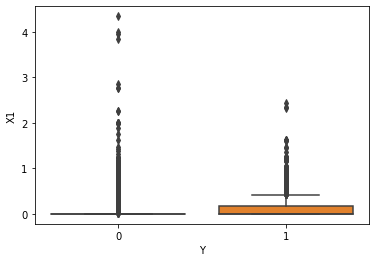

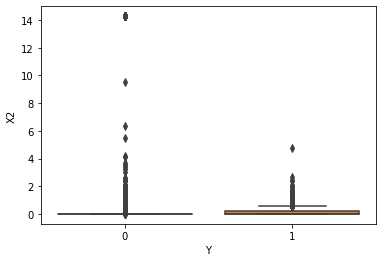

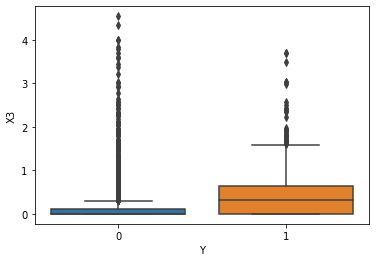

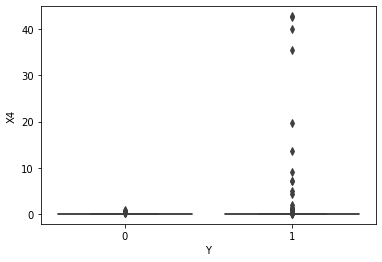

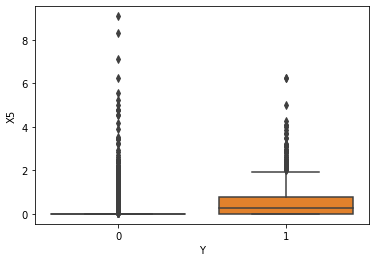

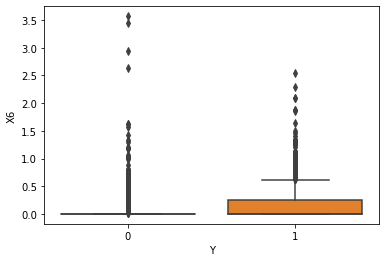

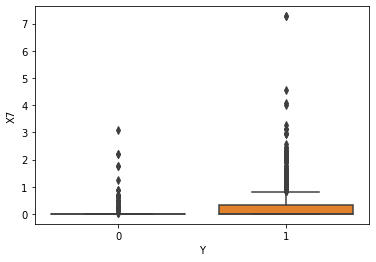

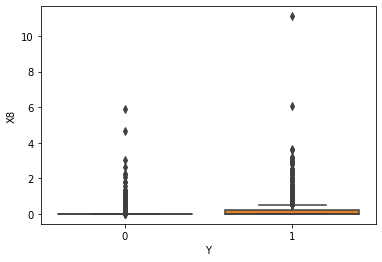

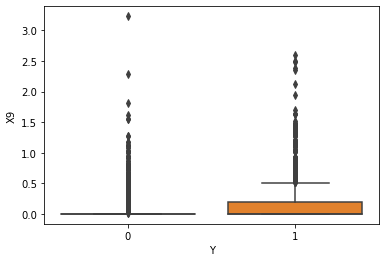

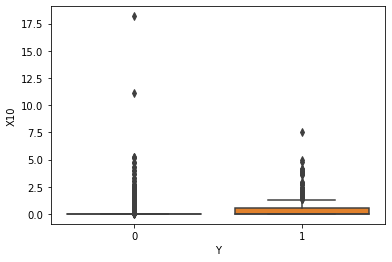

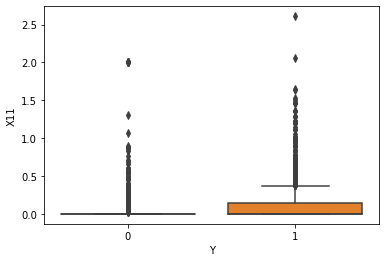

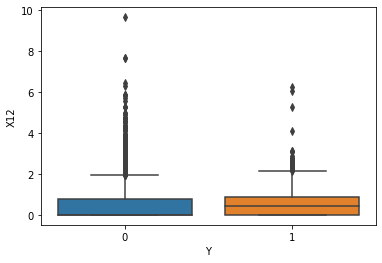

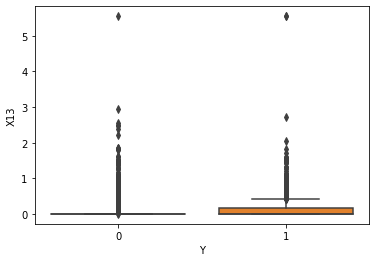

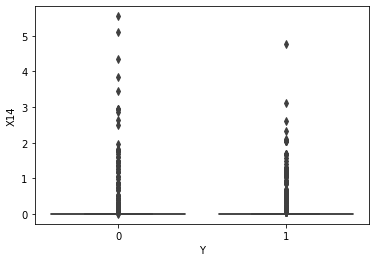

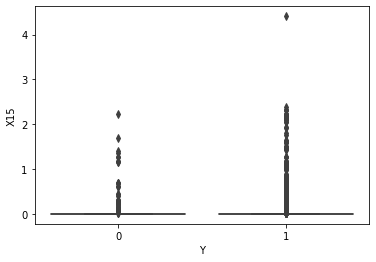

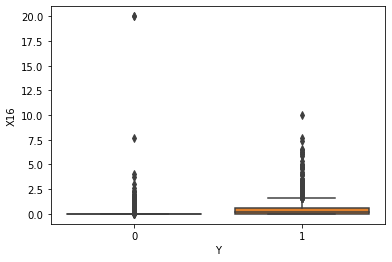

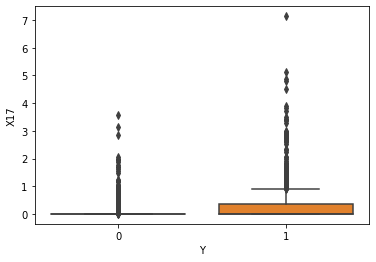

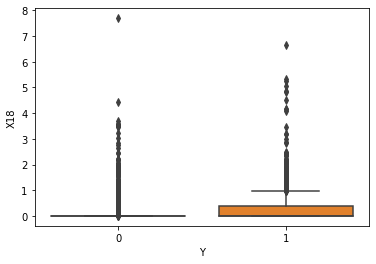

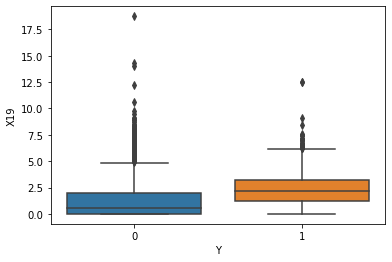

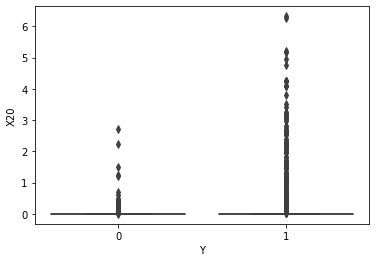

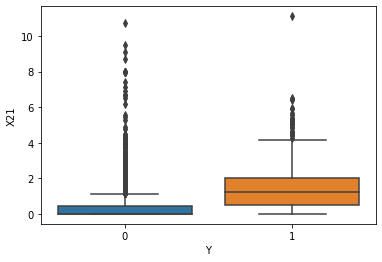

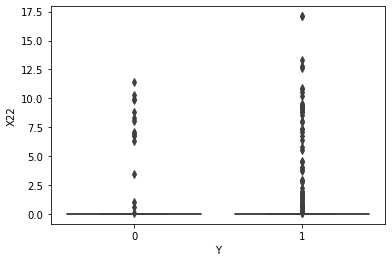

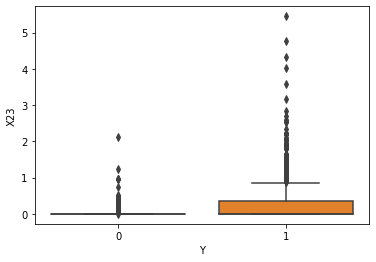

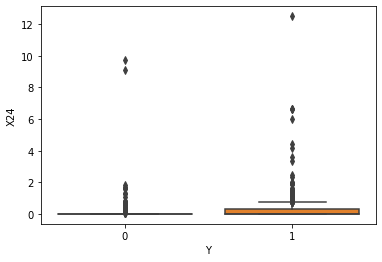

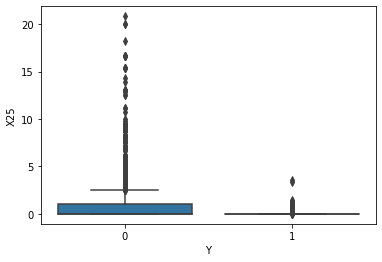

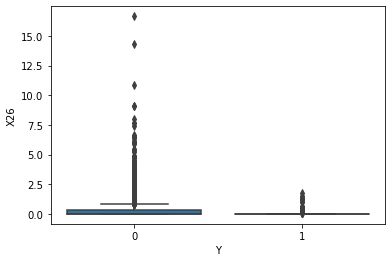

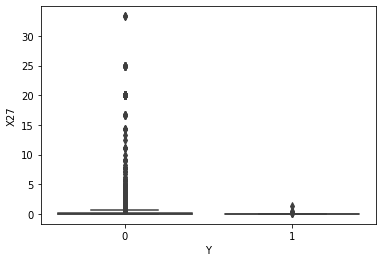

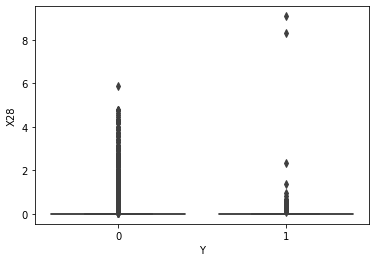

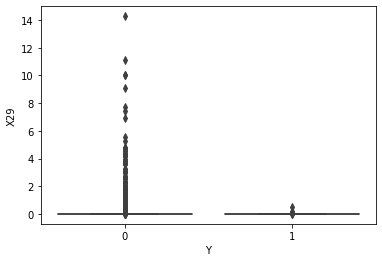

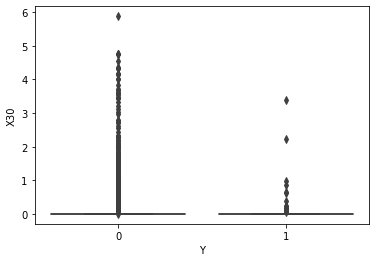

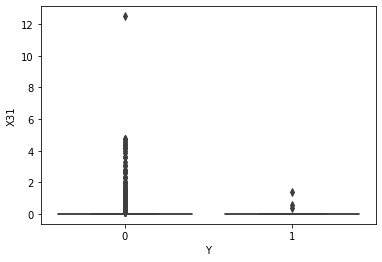

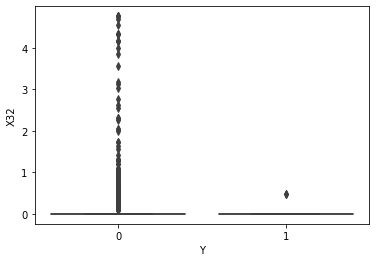

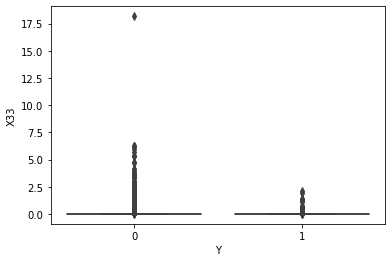

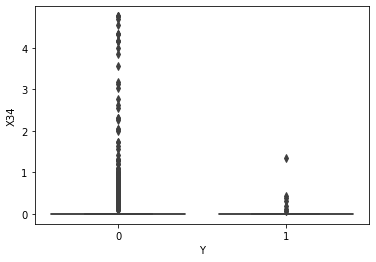

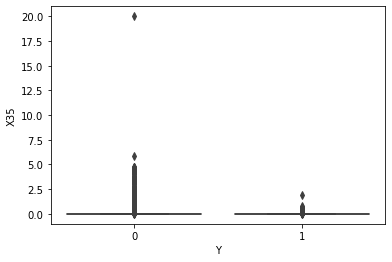

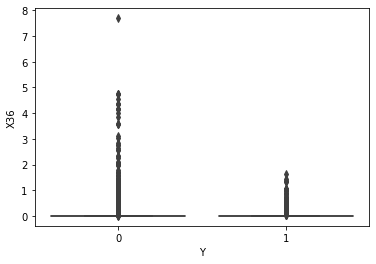

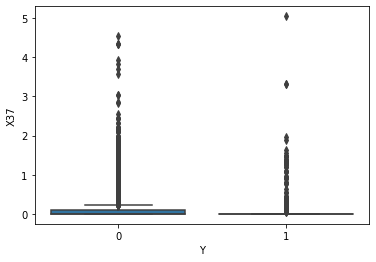

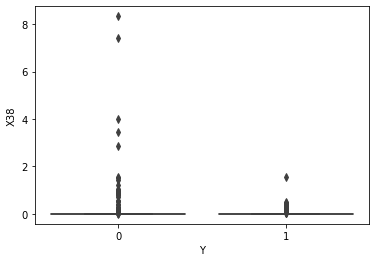

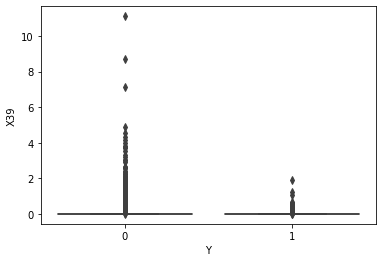

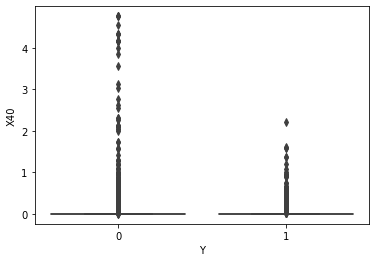

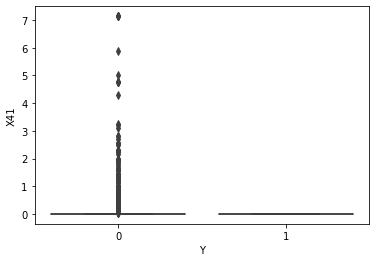

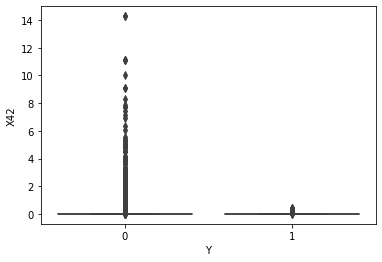

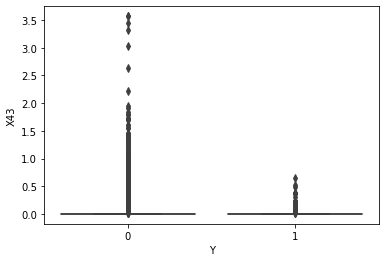

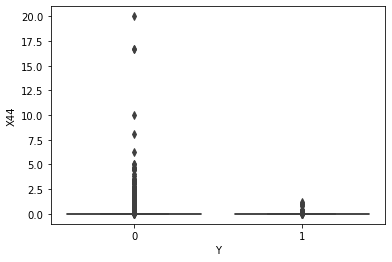

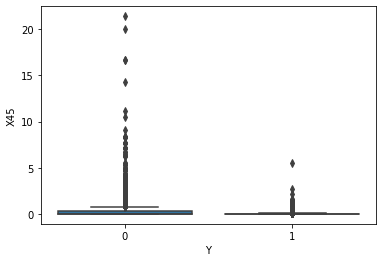

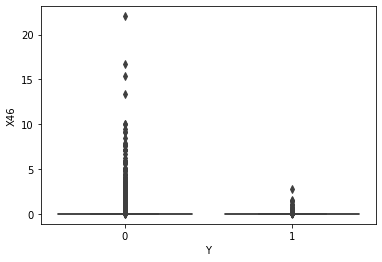

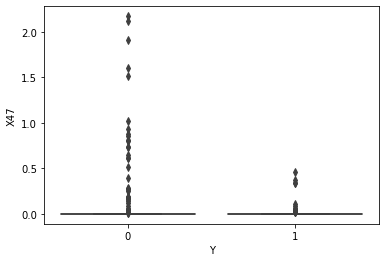

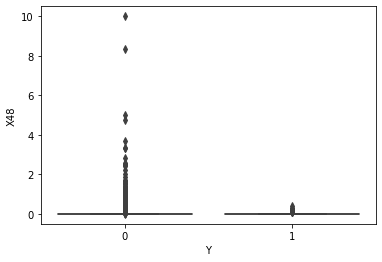

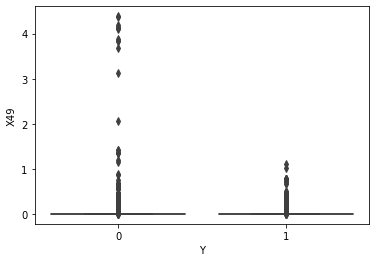

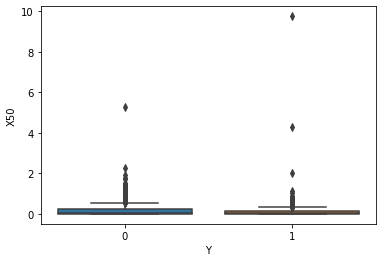

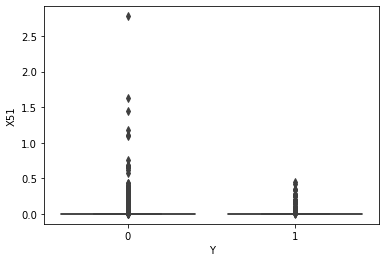

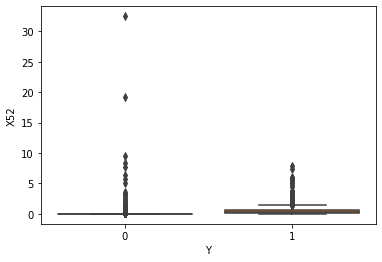

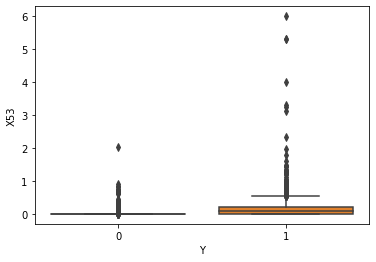

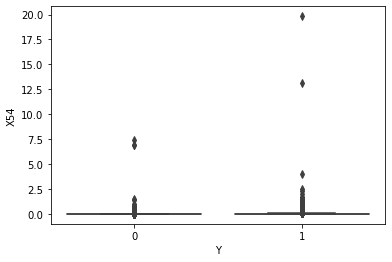

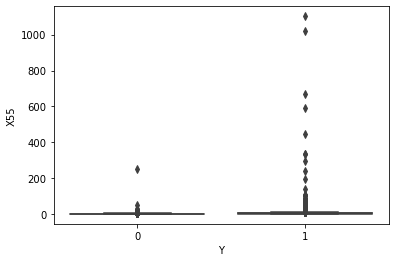

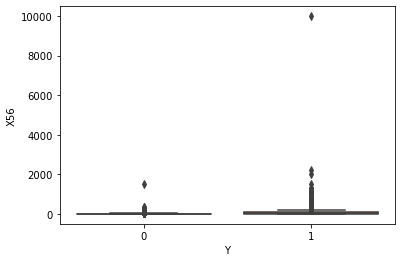

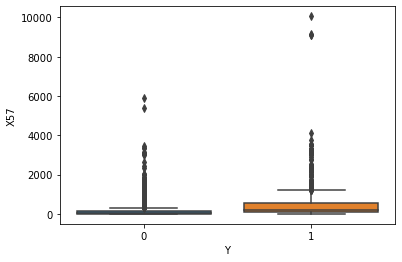

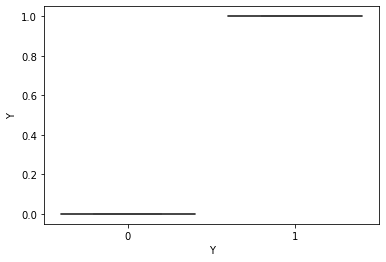

In [15]:

for col in train.columns:
    sns.boxplot(y=train[col],x=train['Y'])
    plt.show()

## Feature Selection

1. Correlation Matrix
2. Random Forest Feature Selection 
3. SelectKBest

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train test split
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size = 0.2,stratify=y, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3128, 57) (782, 57) (3128,) (782,)


### 1. Correlation Matrix

Using Corelation matrix we will be determining highly co-related independent variables(dealing with Multicollinearity)

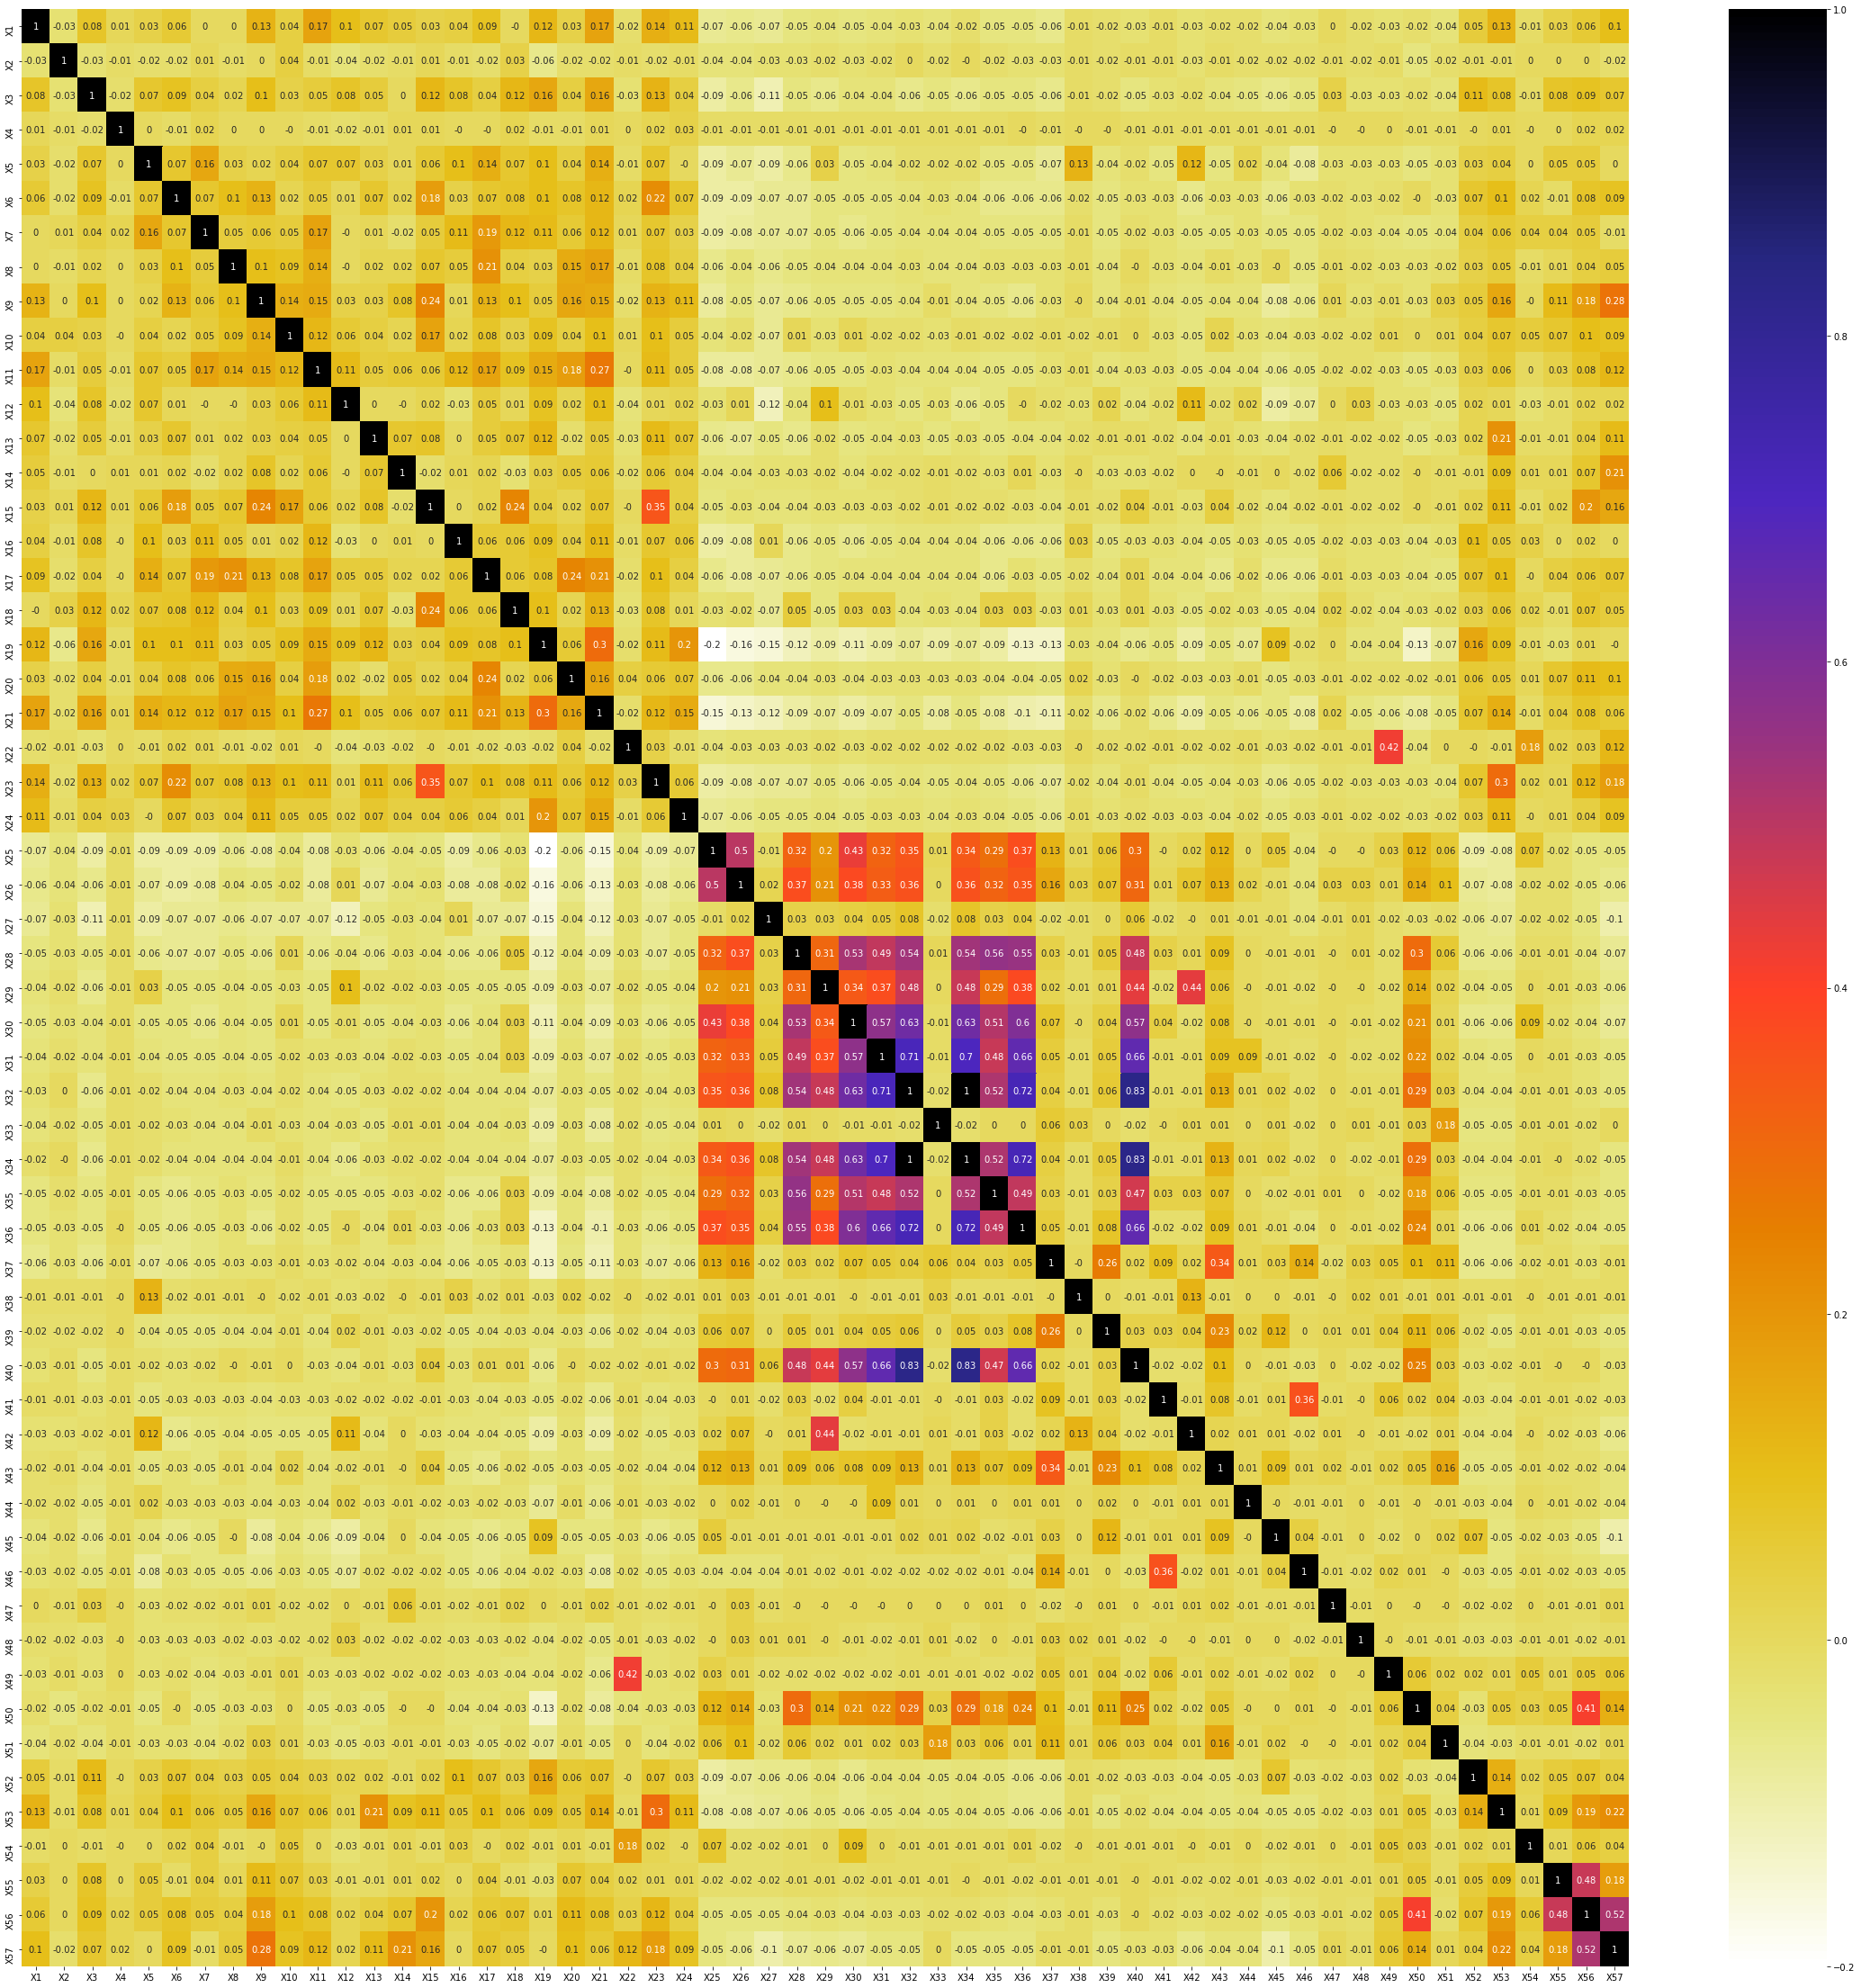

In [18]:
cor = data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(np.round(cor,2), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
def correlation(data, threshold):
    '''
    function to get co-related  columns
    '''
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [20]:
corr_features = correlation(data, 0.5)
print("***Co-related Features***\nNumber of features : ",len(corr_features),"\nFeatures :",corr_features)

***Co-related Features***
Number of features :  8 
Features : {'X31', 'X36', 'X34', 'X30', 'X32', 'X40', 'X57', 'X35'}


In [21]:
#drop the features
X_train_corr = X_train.drop(corr_features, axis=1)
X_val_corr = X_val.drop(corr_features, axis=1)
X_test_corr = test.drop(corr_features, axis=1)
print(X_train_corr.shape)
print(X_val_corr.shape)
print(X_test_corr.shape)

(3128, 49)
(782, 49)
(691, 49)


### 2. Random Forest Feature Selection

In [22]:
# Feature Selection using RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100, max_depth=None, n_jobs=-1)
clf.fit(data,y)
feature_importance = clf.feature_importances_
feature_importance

array([0.00371034, 0.00713628, 0.01302709, 0.0009407 , 0.02496879,
       0.00687111, 0.07517685, 0.01215488, 0.00346994, 0.00948694,
       0.01001331, 0.01103353, 0.00382207, 0.00240224, 0.00095821,
       0.07756651, 0.01631292, 0.0087119 , 0.03275983, 0.00455615,
       0.05943721, 0.0022512 , 0.01967983, 0.03450189, 0.04980367,
       0.01937358, 0.02070137, 0.00450841, 0.00171106, 0.00333997,
       0.00194634, 0.00147514, 0.00235655, 0.0007165 , 0.00328836,
       0.00351212, 0.01061743, 0.00044629, 0.00470749, 0.00113741,
       0.00102578, 0.00605587, 0.00138668, 0.00168739, 0.01010941,
       0.01696653, 0.00016573, 0.00127133, 0.00481885, 0.01302801,
       0.00214852, 0.10376403, 0.1051202 , 0.00376577, 0.06173939,
       0.05816986, 0.03818522])

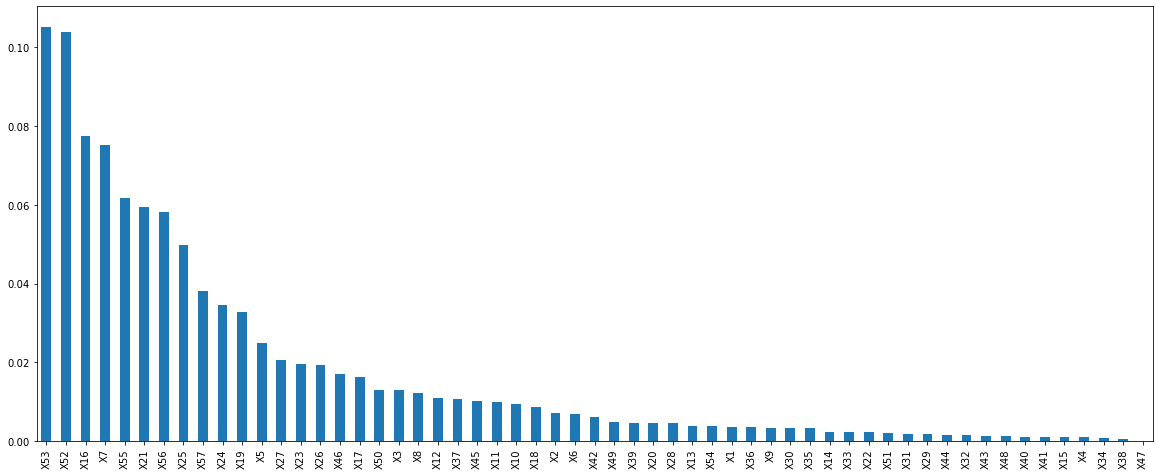

In [23]:
feature_importance = pd.Series(feature_importance)
feature_importance.index = data.columns
feature_importance.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()


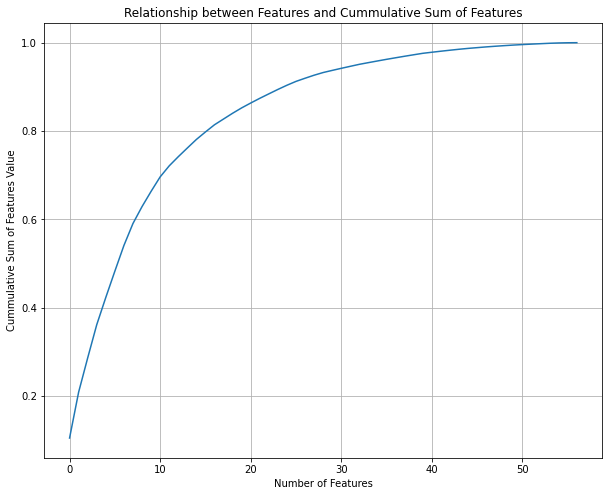

In [24]:
a=np.cumsum(sorted(feature_importance, reverse=True))
b = a/max(a)
plt.figure(figsize=(10,8))
plt.plot(range(57), b)
plt.title('Relationship between Features and Cummulative Sum of Features')
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Cummulative Sum of Features Value')
plt.show()

In [25]:
features = sorted(zip(data.columns,feature_importance),key=lambda x: x[1], reverse=True)
top_features = [x[0] for x in features[:40]]
top_features

['X53',
 'X52',
 'X16',
 'X7',
 'X55',
 'X21',
 'X56',
 'X25',
 'X57',
 'X24',
 'X19',
 'X5',
 'X27',
 'X23',
 'X26',
 'X46',
 'X17',
 'X50',
 'X3',
 'X8',
 'X12',
 'X37',
 'X45',
 'X11',
 'X10',
 'X18',
 'X2',
 'X6',
 'X42',
 'X49',
 'X39',
 'X20',
 'X28',
 'X13',
 'X54',
 'X1',
 'X36',
 'X9',
 'X30',
 'X35']

In [26]:
# Selecting the top features from data
X_train_rf = X_train[top_features]
X_val_rf = X_val[top_features]
X_test_rf = test[top_features]
print(X_train_rf.shape)
print(X_val_rf.shape)
print(X_test_rf.shape)

(3128, 40)
(782, 40)
(691, 40)


In [27]:
print("All Features : ",X_train.shape, X_val.shape, test.shape)
print("Correlation Matrix Feature Selection : ",X_train_corr.shape, X_val_corr.shape, X_test_corr.shape)
print("RF Feature Selection : ",X_train_rf.shape, X_val_rf.shape, X_test_rf.shape)

All Features :  (3128, 57) (782, 57) (691, 57)
Correlation Matrix Feature Selection :  (3128, 49) (782, 49) (691, 49)
RF Feature Selection :  (3128, 40) (782, 40) (691, 40)


### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
def preprocessing(X_train,X_val,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_val_scaled, X_test_scaled


In [30]:
## Scaling selected features

#scale all features
X_train_scaled , X_val_scaled, X_test_scaled = preprocessing(X_train,X_val,test)

#2. Corr matrix selected features
X_train_corr_scaled , X_val_corr_scaled, X_test_corr_scaled = preprocessing(X_train_corr,X_val_corr,X_test_corr)

#3. RF selected features
X_train_rf_scaled , X_val_rf_scaled, X_test_rf_scaled = preprocessing(X_train_rf, X_val_rf, X_test_rf)



## Model Training and Selection

In [31]:
#!pip install -q xgboost

In [32]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc, f1_score,classification_report,confusion_matrix

In [50]:
#baseline Accuracy
max(y.value_counts())/len(y)

0.6076726342710997

In [33]:
def performance_report(model,X_train,y_train,X_val,y_val): 
    
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Get predicted probabilities
    y_pred_prob_train = model.predict_proba(X_train)[:,1]
    y_pred_prob_val = model.predict_proba(X_val)[:,1]
    
    print("\nConfusion Matrix : \n")
    classes = ['0', '1']
    
    fig, axes = plt.subplots(1, 2);
  
    cf_train = confusion_matrix(y_train,y_pred_train)
    sns.heatmap(cf_train, 
                cmap="Blues", 
                annot=True, 
                xticklabels=classes, 
                yticklabels=classes, 
                cbar=False,
                fmt='g',
                square=True,
                ax=axes[0]);
    axes[0].set(title="Train", xlabel="Pred label", ylabel="True label");   
    
    cf_val = confusion_matrix(y_val,y_pred_val)  
    sns.heatmap(cf_val, 
                cmap="Blues", 
                annot=True, 
                xticklabels=classes, 
                yticklabels=classes, 
                cbar=False,
                fmt='g',
                square=True,
                ax=axes[1]);
    axes[1].set(title="Val", xlabel="Pred label", ylabel="True label");

    plt.show();
    
    
    #print Accuracy score
    train_acc = accuracy_score(y_train,y_pred_train)
    val_acc = accuracy_score(y_val,y_pred_val)
    #print("\n\nAccuracy : \nTrain : ",train_acc,"\t\tVal : ",val_acc,"\n")
    
    # Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
    fpr_train, tpr_train, t_train = roc_curve(y_train, y_pred_prob_train)
    fpr_val, tpr_val, t_val = roc_curve(y_val, y_pred_prob_val)
    
    train_auc = roc_auc_score(y_train, y_pred_prob_train)
    val_auc = roc_auc_score(y_val, y_pred_prob_val)
    #print('\n\nAUC score :\nTrain: ',train_auc ,'\t\tVal: ', val_auc) 

    print("\nROC Curve :")
    
    # Plot ROC curves
    plt.plot(fpr_train, tpr_train, label="Train AUC = "+str(auc(fpr_train, tpr_train)));
    plt.plot(fpr_val, tpr_val, label="Val AUC = "+str(auc(fpr_val, tpr_val)));
    plt.legend();
    plt.ylabel('True Positive Rate');
    plt.xlabel('False Positive Rate');
    plt.title("ROC Curve for Train and Val Data\n");
    plt.grid();
    plt.show();
    print("\n")

    f1 = f1_score(y_val, y_pred_val)
    return train_acc, val_acc, train_auc, val_auc,f1

In [34]:
def fit_and_evaluate(model,X_train, y_train,X_val, y_val,select_features=None,scale=False):  
    """Fit and evaluate each model."""
    print("===="*30)
    metrics = {}
    
    if select_features=='corr': 
        metrics['feature-selection'] = 'correlation-matrix'
        
    elif select_features=='rf': 
        metrics['feature-selection'] = 'random-forest-feature-selection'
    else:
        metrics['feature-selection'] = 'all-features'
    
    if scale: 
        metrics['scaling'] = 'yes'
    else:
        metrics['scaling'] = 'no'
    
    print("Feature Selection Technique : ",metrics['feature-selection'])
    print("Scaling of Features : ",metrics['scaling'])
    model.fit(X_train, y_train)
    train_acc, val_acc, train_auc, val_auc, f1 = performance_report(model,X_train,y_train,X_val,y_val)
    
    metrics['train_accuracy'] = train_acc
    metrics['val_Accuracy'] = val_acc
    metrics['train_AUC'] = train_auc
    metrics['val_AUC'] = val_auc
    metrics['f1_score'] = f1
    
    
        
    return metrics

In [35]:
performance = {}

## Logistic Regression

Logistic Regression : 

Feature Selection Technique :  all-features
Scaling of Features :  no

Confusion Matrix : 



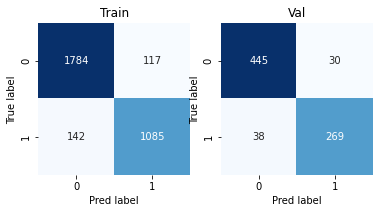


ROC Curve :


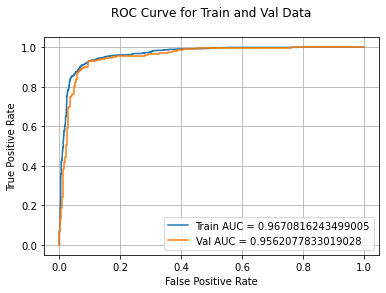



{
   "feature-selection": "all-features",
   "scaling": "no",
   "train_accuracy": 0.9171994884910486,
   "val_Accuracy": 0.9130434782608695,
   "train_AUC": 0.9670816243499005,
   "val_AUC": 0.9562077833019028,
   "f1_score": 0.8877887788778877
} 

Feature Selection Technique :  all-features
Scaling of Features :  yes

Confusion Matrix : 



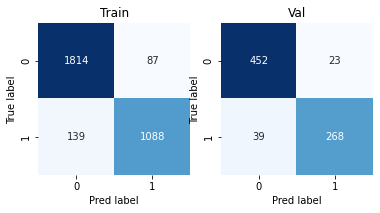


ROC Curve :


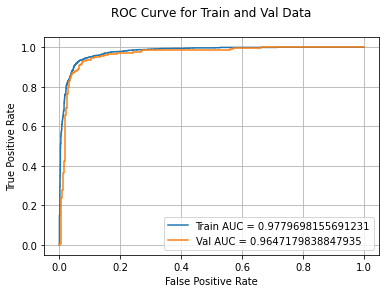



{
   "feature-selection": "all-features",
   "scaling": "yes",
   "train_accuracy": 0.9277493606138107,
   "val_Accuracy": 0.9207161125319693,
   "train_AUC": 0.9779698155691231,
   "val_AUC": 0.9647179838847935,
   "f1_score": 0.8963210702341137
} 

Feature Selection Technique :  correlation-matrix
Scaling of Features :  yes

Confusion Matrix : 



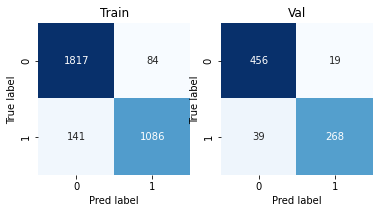


ROC Curve :


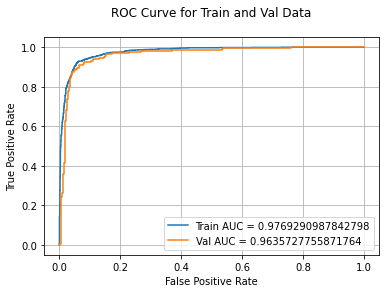



{
   "feature-selection": "correlation-matrix",
   "scaling": "yes",
   "train_accuracy": 0.92806905370844,
   "val_Accuracy": 0.9258312020460358,
   "train_AUC": 0.9769290987842798,
   "val_AUC": 0.9635727755871764,
   "f1_score": 0.9023569023569024
} 

Feature Selection Technique :  random-forest-feature-selection
Scaling of Features :  no

Confusion Matrix : 



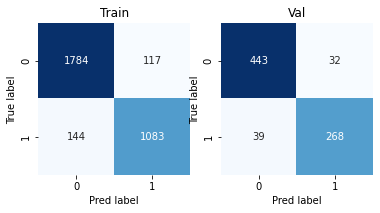


ROC Curve :


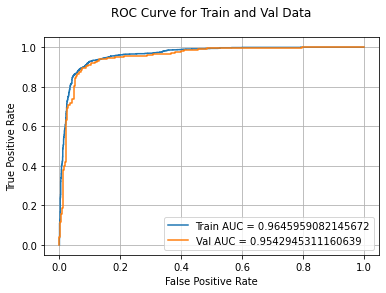



{
   "feature-selection": "random-forest-feature-selection",
   "scaling": "no",
   "train_accuracy": 0.9165601023017903,
   "val_Accuracy": 0.9092071611253197,
   "train_AUC": 0.9645959082145672,
   "val_AUC": 0.9542945311160639,
   "f1_score": 0.8830313014827017
} 



In [36]:
print("Logistic Regression : \n")
lr_metrics = {}
# Logistic Regression Models

performance['logistic-regression'] = []

lr = LogisticRegression()
#Logistic Regression with all features and without scaling
lr_metrics[1] = fit_and_evaluate(lr,
                                 X_train, y_train, X_val, y_val,
                                 select_features='all',
                                 scale=False)

print(json.dumps(lr_metrics[1],indent=3),"\n")


#LR with all features and with scaling
lr_metrics[2] = fit_and_evaluate(lr,
                                X_train_scaled, y_train, X_val_scaled, y_val,
                                select_features='all',
                                scale=True)
print(json.dumps(lr_metrics[2],indent=3),"\n")


#Correlation matrix selected features with scaling
lr_metrics[3] = fit_and_evaluate(lr,
                                 X_train_corr_scaled, y_train, X_val_corr_scaled, y_val,
                                 select_features = 'corr',
                                 scale = True)
print(json.dumps(lr_metrics[3],indent=3),"\n")


#RF selected features without scaling
lr_metrics[4] = fit_and_evaluate(lr,
                                 X_train_rf, y_train, X_val_rf, y_val,
                                 select_features = 'rf',
                                 scale = False)
print(json.dumps(lr_metrics[4],indent=3),"\n")



performance['logistic-regression'] = [lr_metrics]


In [37]:
print(json.dumps(performance,indent=6))

{
      "logistic-regression": [
            {
                  "1": {
                        "feature-selection": "all-features",
                        "scaling": "no",
                        "train_accuracy": 0.9171994884910486,
                        "val_Accuracy": 0.9130434782608695,
                        "train_AUC": 0.9670816243499005,
                        "val_AUC": 0.9562077833019028,
                        "f1_score": 0.8877887788778877
                  },
                  "2": {
                        "feature-selection": "all-features",
                        "scaling": "yes",
                        "train_accuracy": 0.9277493606138107,
                        "val_Accuracy": 0.9207161125319693,
                        "train_AUC": 0.9779698155691231,
                        "val_AUC": 0.9647179838847935,
                        "f1_score": 0.8963210702341137
                  },
                  "3": {
                        "feature-selection": "correla

## KNN

KNN : 

Feature Selection Technique :  all-features
Scaling of Features :  yes
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:    5.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.6s finished



Confusion Matrix : 



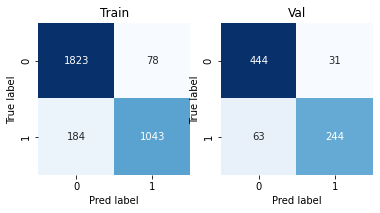


ROC Curve :


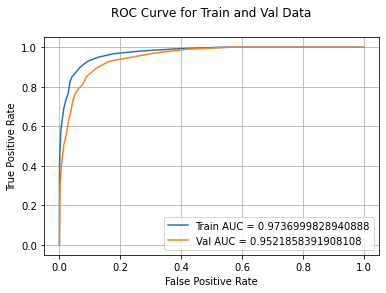



Best Parameters :  {'n_neighbors': 17}
{
   "feature-selection": "all-features",
   "scaling": "yes",
   "train_accuracy": 0.9162404092071611,
   "val_Accuracy": 0.8797953964194374,
   "train_AUC": 0.9736999828940888,
   "val_AUC": 0.9521858391908108,
   "f1_score": 0.8384879725085911
} 

Feature Selection Technique :  correlation-matrix
Scaling of Features :  yes
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.3s finished



Confusion Matrix : 



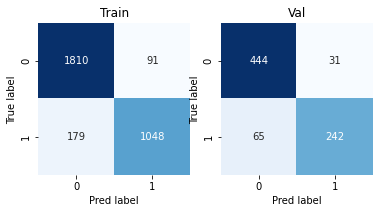


ROC Curve :


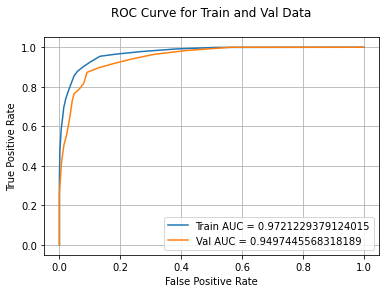



Best Parameters :  {'n_neighbors': 17}
{
   "feature-selection": "correlation-matrix",
   "scaling": "yes",
   "train_accuracy": 0.9136828644501279,
   "val_Accuracy": 0.8772378516624041,
   "train_AUC": 0.9721229379124015,
   "val_AUC": 0.9497445568318189,
   "f1_score": 0.8344827586206897
} 

Feature Selection Technique :  random-forest-feature-selection
Scaling of Features :  yes
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1439s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished



Confusion Matrix : 



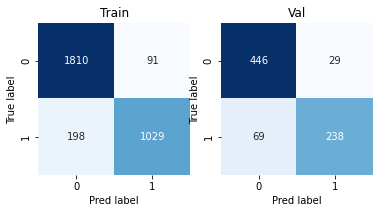


ROC Curve :


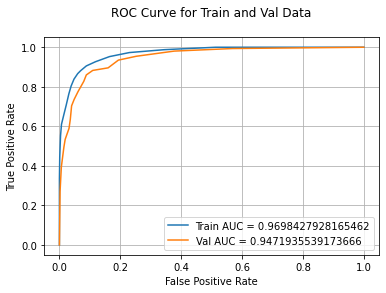



Best Parameters :  {'n_neighbors': 17}
{
   "feature-selection": "random-forest-feature-selection",
   "scaling": "yes",
   "train_accuracy": 0.907608695652174,
   "val_Accuracy": 0.8746803069053708,
   "train_AUC": 0.9698427928165462,
   "val_AUC": 0.9471935539173666,
   "f1_score": 0.8292682926829269
} 



In [38]:
#set the tuning parameters (k) for grid search
from sklearn.neighbors import KNeighborsClassifier
knn_metrics = {}

print("KNN : \n")

knn_pram_grid = {
    'n_neighbors': [7, 9, 11, 13, 15,17,19,21,23],
}

# build the KNN model
knn_clf = GridSearchCV(KNeighborsClassifier(),
                       knn_pram_grid,
                       cv=10,
                       verbose = 10,
                       n_jobs=-1,
                       scoring='roc_auc')

#Knn with all features and with scaling
knn_metrics[1] = fit_and_evaluate(knn_clf,
                                 X_train_scaled, y_train, X_val_scaled, y_val,
                                 select_features='all',
                                 scale=True)
print("Best Parameters : ",knn_clf.best_params_)
print(json.dumps(knn_metrics[1],indent=3),"\n")


#Correlation matrix selected features with scaling
knn_metrics[2] = fit_and_evaluate(knn_clf,
                                 X_train_corr_scaled, y_train, X_val_corr_scaled, y_val,
                                 select_features = 'corr',
                                 scale = True)
print("Best Parameters : ",knn_clf.best_params_)
print(json.dumps(knn_metrics[2],indent=3),"\n")


#RF selected features with scaling
knn_metrics[3] = fit_and_evaluate(knn_clf,
                                 X_train_rf_scaled, y_train, X_val_rf_scaled, y_val,
                                 select_features = 'rf',
                                 scale = True)
print("Best Parameters : ",knn_clf.best_params_)
print(json.dumps(knn_metrics[3],indent=3),"\n")



performance['knn'] = [knn_metrics]

In [39]:
print(json.dumps(performance,indent=6))

{
      "logistic-regression": [
            {
                  "1": {
                        "feature-selection": "all-features",
                        "scaling": "no",
                        "train_accuracy": 0.9171994884910486,
                        "val_Accuracy": 0.9130434782608695,
                        "train_AUC": 0.9670816243499005,
                        "val_AUC": 0.9562077833019028,
                        "f1_score": 0.8877887788778877
                  },
                  "2": {
                        "feature-selection": "all-features",
                        "scaling": "yes",
                        "train_accuracy": 0.9277493606138107,
                        "val_Accuracy": 0.9207161125319693,
                        "train_AUC": 0.9779698155691231,
                        "val_AUC": 0.9647179838847935,
                        "f1_score": 0.8963210702341137
                  },
                  "3": {
                        "feature-selection": "correla

## Random Forest

Random Forest Classifier : 

Feature Selection Technique :  all-features
Scaling of Features :  no
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished



Confusion Matrix : 



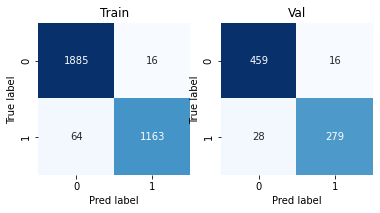


ROC Curve :


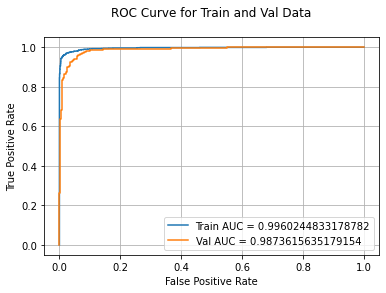



Best Parameters :  {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 15}
{
   "feature-selection": "all-features",
   "scaling": "no",
   "train_accuracy": 0.9744245524296675,
   "val_Accuracy": 0.9437340153452686,
   "train_AUC": 0.9960244833178782,
   "val_AUC": 0.9873615635179154,
   "f1_score": 0.9269102990033222
} 

Feature Selection Technique :  correlation-matrix
Scaling of Features :  no
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished



Confusion Matrix : 



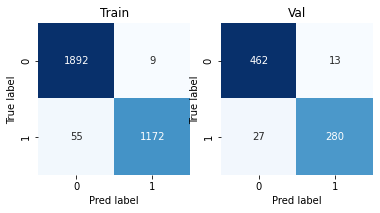


ROC Curve :


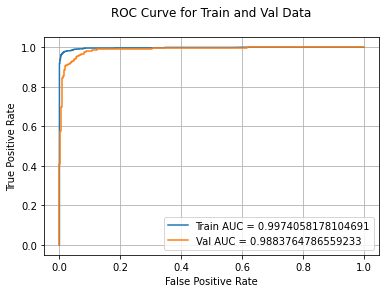



Best Parameters :  {'n_estimators': 250, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}
{
   "feature-selection": "correlation-matrix",
   "scaling": "no",
   "train_accuracy": 0.979539641943734,
   "val_Accuracy": 0.948849104859335,
   "train_AUC": 0.9974058178104691,
   "val_AUC": 0.9883764786559233,
   "f1_score": 0.9333333333333333
} 

Feature Selection Technique :  random-forest-feature-selection
Scaling of Features :  no
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished



Confusion Matrix : 



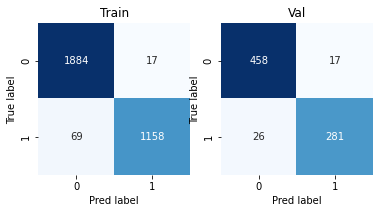


ROC Curve :


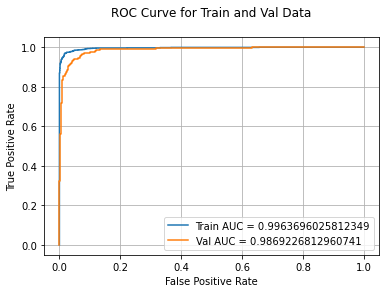



Best Parameters :  {'n_estimators': 190, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15}
{
   "feature-selection": "random-forest-feature-selection",
   "scaling": "no",
   "train_accuracy": 0.9725063938618926,
   "val_Accuracy": 0.9450127877237852,
   "train_AUC": 0.9963696025812349,
   "val_AUC": 0.9869226812960741,
   "f1_score": 0.9289256198347108
} 



In [40]:
from sklearn.model_selection import RandomizedSearchCV
rf_metrics = {}

print("Random Forest Classifier : \n")

rfc = RandomForestClassifier(n_jobs=-1,
                             oob_score=False,
                             random_state=42)

rf_param_grid = {
    'n_estimators': np.arange(10, 300, 30),
    'max_features': ['auto', 'log2','sqrt'],
    'max_depth': [3,5,7,10,15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],

}


# build the RF model
grid_search_rf = RandomizedSearchCV(estimator = rfc, 
                              param_distributions = rf_param_grid,
                              cv = 3, 
                              n_jobs = -1, 
                              verbose = 1)

#Knn with all features and without scaling
rf_metrics[1] = fit_and_evaluate(grid_search_rf,
                                 X_train, y_train, X_val, y_val,
                                 select_features='all',
                                 scale=False)
print("Best Parameters : ",grid_search_rf.best_params_)
print(json.dumps(rf_metrics[1],indent=3),"\n")


#Correlation matrix selected features without scaling
rf_metrics[2] = fit_and_evaluate(grid_search_rf,
                                 X_train_corr, y_train, X_val_corr, y_val,
                                 select_features='corr',
                                 scale=False)
print("Best Parameters : ",grid_search_rf.best_params_)
print(json.dumps(rf_metrics[2],indent=3),"\n")



#RF selected features with scaling
rf_metrics[3] = fit_and_evaluate(grid_search_rf,
                                 X_train_rf, y_train, X_val_rf, y_val,
                                 select_features='rf',
                                 scale=False)
print("Best Parameters : ",grid_search_rf.best_params_)
print(json.dumps(rf_metrics[3],indent=3),"\n")



performance['random-forest'] = [rf_metrics]

In [41]:
print(json.dumps(performance,indent=6))

{
      "logistic-regression": [
            {
                  "1": {
                        "feature-selection": "all-features",
                        "scaling": "no",
                        "train_accuracy": 0.9171994884910486,
                        "val_Accuracy": 0.9130434782608695,
                        "train_AUC": 0.9670816243499005,
                        "val_AUC": 0.9562077833019028,
                        "f1_score": 0.8877887788778877
                  },
                  "2": {
                        "feature-selection": "all-features",
                        "scaling": "yes",
                        "train_accuracy": 0.9277493606138107,
                        "val_Accuracy": 0.9207161125319693,
                        "train_AUC": 0.9779698155691231,
                        "val_AUC": 0.9647179838847935,
                        "f1_score": 0.8963210702341137
                  },
                  "3": {
                        "feature-selection": "correla

## XGB Classifier

XGBoost Classifier : 

Feature Selection Technique :  all-features
Scaling of Features :  no
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.1s finished



Confusion Matrix : 



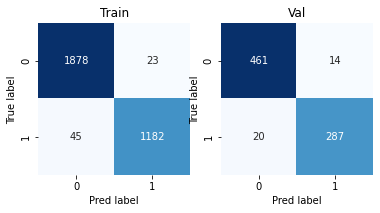


ROC Curve :


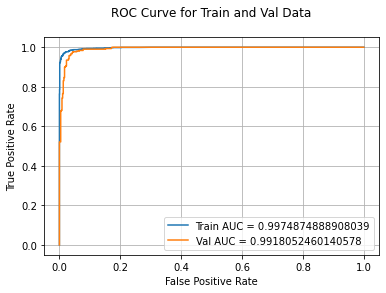



Best Parameters :  {'n_estimators': 50, 'max_depth': 4}
{
   "feature-selection": "all-features",
   "scaling": "no",
   "train_accuracy": 0.9782608695652174,
   "val_Accuracy": 0.9565217391304348,
   "train_AUC": 0.9974874888908039,
   "val_AUC": 0.9918052460140578,
   "f1_score": 0.9440789473684211
} 

Feature Selection Technique :  correlation-matrix
Scaling of Features :  no
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.2s finished



Confusion Matrix : 



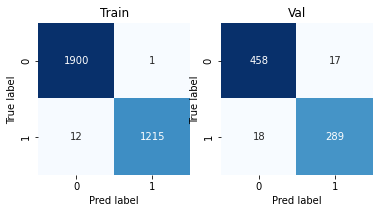


ROC Curve :


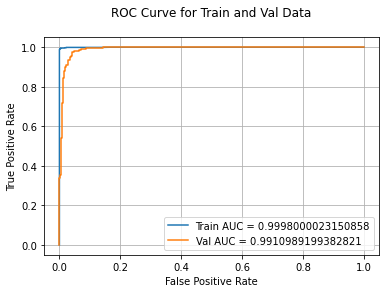



Best Parameters :  {'n_estimators': 50, 'max_depth': 8}
{
   "feature-selection": "correlation-matrix",
   "scaling": "no",
   "train_accuracy": 0.995843989769821,
   "val_Accuracy": 0.9552429667519181,
   "train_AUC": 0.9998000023150858,
   "val_AUC": 0.9910989199382821,
   "f1_score": 0.9429037520391517
} 

Feature Selection Technique :  random-forest-feature-selection
Scaling of Features :  no
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.8s finished



Confusion Matrix : 



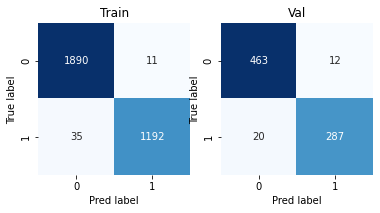


ROC Curve :


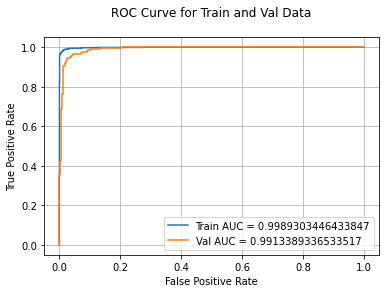



Best Parameters :  {'n_estimators': 50, 'max_depth': 5}
{
   "feature-selection": "random-forest-feature-selection",
   "scaling": "no",
   "train_accuracy": 0.9852941176470589,
   "val_Accuracy": 0.959079283887468,
   "train_AUC": 0.9989303446433847,
   "val_AUC": 0.9913389336533517,
   "f1_score": 0.9471947194719472
} 



In [42]:
xgb_metrics = {}

print("XGBoost Classifier : \n")

est = xgb.sklearn.XGBClassifier(eval_metric= 'auc', 
                                objective='binary:logistic')

xg_param_grid = {'n_estimators' : [5, 10, 50, 100, 150, 200, 250, 500], 
                 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10] }

xgb_clf = RandomizedSearchCV(est, 
                       xg_param_grid, 
                       cv=5, 
                       scoring='roc_auc', 
                       verbose=1, 
                       n_jobs=-1, 
                       return_train_score=True)

#xgb with all features and without scaling
xgb_metrics[1] = fit_and_evaluate(xgb_clf,
                                 X_train, y_train, X_val, y_val,
                                 select_features='all',
                                 scale=False)
print("Best Parameters : ",xgb_clf.best_params_)
print(json.dumps(xgb_metrics[1],indent=3),"\n")


#Correlation matrix selected features without scaling
xgb_metrics[2] = fit_and_evaluate(xgb_clf,
                                 X_train_corr, y_train, X_val_corr, y_val,
                                 select_features='corr',
                                 scale=False)
print("Best Parameters : ",xgb_clf.best_params_)
print(json.dumps(xgb_metrics[2],indent=3),"\n")



#RF selected features with scaling
xgb_metrics[3] = fit_and_evaluate(xgb_clf,
                                 X_train_rf, y_train, X_val_rf, y_val,
                                 select_features='rf',
                                 scale=False)
print("Best Parameters : ",xgb_clf.best_params_)
print(json.dumps(xgb_metrics[3],indent=3),"\n")



performance['xgb-classifier'] = [xgb_metrics]

In [48]:
print(json.dumps(performance,indent=6))

{
      "logistic-regression": [
            {
                  "1": {
                        "feature-selection": "all-features",
                        "scaling": "no",
                        "train_accuracy": 0.9171994884910486,
                        "val_Accuracy": 0.9130434782608695,
                        "train_AUC": 0.9670816243499005,
                        "val_AUC": 0.9562077833019028,
                        "f1_score": 0.8877887788778877
                  },
                  "2": {
                        "feature-selection": "all-features",
                        "scaling": "yes",
                        "train_accuracy": 0.9277493606138107,
                        "val_Accuracy": 0.9207161125319693,
                        "train_AUC": 0.9779698155691231,
                        "val_AUC": 0.9647179838847935,
                        "f1_score": 0.8963210702341137
                  },
                  "3": {
                        "feature-selection": "correla

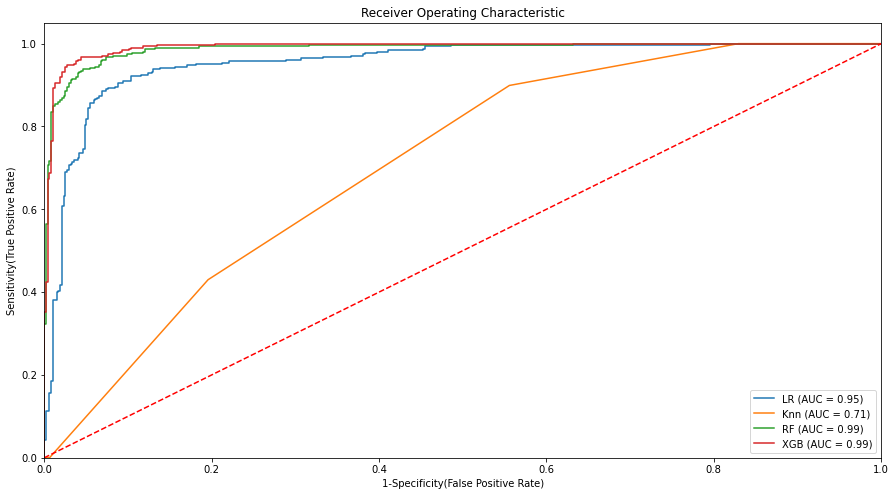

In [47]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(15,8))
classifiers = [lr,knn_clf,grid_search_rf,xgb_clf]
c = ['LR','Knn','RF','XGB']
ax = plt.gca()
for i in range(len(classifiers)):
    plot_roc_curve(classifiers[i], X_val_rf, y_val, ax=ax, name=c[i])

plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()  # Display

For calisification task we can consider below metrics to evaluate performance and select classification model.

1. **Confusion matrix :**
    A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 



2. **Accuracy :** 

    `Accuracy = (TP + TN) / (TP + FP +TN + FN)`
        
    This term tells us how many right classifications were made out of all the classifications. In other words, how many TPs and TNs were done out of TP + TN + FP + FNs. It tells the ratio of “True”s to the sum of “True”s and “False”s. We have problem with Accuracy when dataset is highly imbalanced
        
        
        
3. **F1 score :**

    `F1 score = 2* (Precision * Recall) / (Precision + Recall)`
    
    As sometime we need to give weightage to FP and sometime to FN ,thus we use f1 which gives equal weightage to FN and FP.
    Here I will consider F1 score since we are not sure which needs more weightage based on severity of usecase
    
    
    
4. **AUC and ROC curve :**

    A perfect model has a 100% probability of classifying the positive and negative classes correctly. Here, the AUC = 1. So when we want to select the best model, we want a model that is closest to the perfect model. In other words, a model with AUC close to 1. When we say a model has a high AUC score, it means the model’s ability to separate the classes is very high (high separability). This is a very important metric that should be checked while selecting a classification model.
    

# Summary :

## 1. Used 2 techniques for feature selection process - Correlation matrix and Random Forest 

## 2. As part of preprocessing , StandardScaler was used to perform feature scaling

## 3. Model Comparion and Evaluation:

### 1. Logistic Regression : Model was getting overfitted slightly based on the AUC and ROC curve, results obtained we good and better compared to baseline model ( <31%).
    
### 2. KNN - Knn model performed well but tends to be overfitted and need more parameter tunning(k-value) to obtain best results    

### 3. Random Forest : Random Forest performed good compared to LR and Knn and prevented model from overfitting. Here we can skip the process of scailing features. Correlation Feature selection gave slight 1% good results as compared to RF feature selection technique

### 4. XGB Classifier : XGB classifer with hyperparameter tunning performed better with .94 as f1 score and AUC equal to .99

### Above AUC & ROC graph shows the compared results of different fitted models

### Predictions on Test Data

In [52]:
xgb_clf.best_params_

{'n_estimators': 50, 'max_depth': 5}

In [53]:
xgb = xgb.sklearn.XGBClassifier(eval_metric= 'auc', 
                                objective='binary:logistic',
                                n_estimators = 50,
                                max_depth = 5,
                                verbose = 10,
                                jobs = -1)

xgb.fit(X_train_rf,y_train)


[16:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "jobs", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', jobs=-1, learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=10, ...)

In [56]:
xgb.score(X_train_rf,y_train)

0.9852941176470589

### Save predictions to CSV file

In [65]:
results = pd.DataFrame()
results['Y'] = xgb.predict(X_test_rf)

In [66]:
results.to_csv('results.csv',index=False)

In [67]:
# Writing to perfomrance mr=etrics to .json
json_object = json.dumps(performance,indent=6)
with open("performance_results.json", "w") as outfile:
    outfile.write(json_object)